# NLTK Chapter 5

## Categorizing and Tagging Words

*The html version of this chapter in the NLTK book is available [here](https://www.nltk.org/book/ch05.html#exercises "Ch05 Exercises").*

### 5.10   Exercises

##### 1.

☼ Search the web for "spoof newspaper headlines", to find such gems as: *British Left Waffles on Falkland Islands*, and *Juvenile Court to Try Shooting Defendant*. Manually tag these headlines to see if knowledge of the part-of-speech tags removes the ambiguity.

*No, the ambiguity is not necessarily removed.  For example, in __"Drunk Gets Nine Months in Violin Case"__, the ambiguity concerns the two senses of the word "Case", which are both nouns.  Likewise with the headline __"Miners Refuse to Work after Death"__, where the two senses of "Death" are also nouns.*  

##### 2.

☼ Working with someone else, take turns to pick a word that can be either a noun or a verb (e.g. *contest*); the opponent has to predict which one is likely to be the most frequent in the Brown corpus; check the opponent's prediction, and tally the score over several turns.

*I'm just playing against myself.  I took a list of words from [this page](https://www.businessenglishresources.com/learn-english-for-business/teachers-section/mini-lessons/pronunciation-lessons-pronunciation-changes-in-words-that-are-both-nouns-and-verbs/ "words that are both nouns and verbs"), and manually sorted them into two lists: one for words I thought were more likely to be nouns, and one for words I thought were more likely to be verbs.  I then devised code which programmatically check this for me:*

In [29]:
import nltk

In [30]:
btw = nltk.corpus.brown.tagged_words()
cfd = nltk.ConditionalFreqDist(btw)
likely_nouns = ["conduct", "combat", "conflict", "contest", "contract", 
                "impact", "insult", "object", "present", "progress", "project",
                "rebel", "refill", "refund", "subject"]

In [31]:
sum([cfd[ln].most_common()[0][0] == 'NN' for ln in likely_nouns])/len(likely_nouns)

0.8666666666666667

In [32]:
[(ln, cfd[ln].most_common()) for ln in likely_nouns if cfd[ln].most_common()[0][0] != 'NN']

[('present', [('JJ', 220), ('RB', 63), ('NN', 44), ('VB', 39), ('AP', 4)]),
 ('refill', [('VB', 1)])]

In [33]:
nltk.help.brown_tagset('JJ')

JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate ambiguous grand clerical effective
    orderly federal foster general proportionate ...


*I neglected to consider that 'present' can also be an adjective.  I was also suprised that 'refill' was only in the corpus once, which may be an artifact of the corpus's age, as soft drink fountains weren't as ubiquitous 50 years ago.*

*Trying the same with the words I suspect are more common as verbs:*

In [34]:
dual_meaning = ["conduct", "attribute", "combat", "conflict", "contest", 
                "contract", "decrease", "escort", "impact", "increase", 
                "insult", "object", "permit", "present", "proceed", "progress",
                "project", "rebel", "refill", "refund", "reject", "repeat", 
                "subject", "suspect"]
likely_verbs = [dm for dm in dual_meaning if dm not in likely_nouns]

In [35]:
sum([cfd[lv].most_common()[0][0] == 'VB' for lv in likely_verbs])/len(likely_verbs)

0.6666666666666666

In [36]:
[(lv, cfd[lv].most_common()) for lv in likely_verbs if cfd[lv].most_common()[0][0] != 'VB']

[('attribute', [('NN', 4), ('VB', 2)]),
 ('escort', [('NN', 5), ('VB', 4)]),
 ('increase', [('NN', 112), ('VB', 81), ('VB-HL', 1)])]

##### 3. 

☼ Tokenize and tag the following sentence: *They wind back the clock, while we chase after the wind.* What different pronunciations and parts of speech are involved?

*Using the universal tagset.  A good description thereof can be found [here](https://universaldependencies.org/u/pos/ "Universal Tagset"):*

They|PRON wind|VERB back|ADP the|DET clock|NOUN ,|PUNCT while|CCONJ we|PRON chase|VERB after|ADP the|DET wind|NOUN .|PUNCT

*The only homonyms that could be pronounced differently are wind|VERB __/ˈwaɪnd/__ and wind|NOUN __/ˈwɪnd/__.*

##### 4. 

☼ Review the mappings in [3.1](https://www.nltk.org/book/ch05.html#tab-linguistic-objects). Discuss any other examples of mappings you can think of. What type of information do they map from and to?

*A phone book maps from names to phone numbers;  A map maps from GPS coordinates to a physical location;  A schedule maps from times to events; etc...*

#### 5.

☼ Using the Python interpreter in interactive mode, experiment with the dictionary examples in this chapter. Create a dictionary `d`, and add some entries. What happens if you try to access a non-existent entry, e.g. `d['xyz']`?


In [37]:
d = {'123': 'easy as', 'DoReMi': 'simple as', 'abc': 'baby, you and me girl'}

*Looking up a non-existent key will throw an error:*

```
d['xyz']

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-27-eff1decdc6c9> in <module>
----> 1 d['xyz']

KeyError: 'xyz'
    
```

##### 6.

☼ Try deleting an element from a dictionary `d`, using the syntax `del d['abc']`. Check that the item was deleted.

In [38]:
d['abc']

'baby, you and me girl'

In [39]:
del d['abc']

```
d['abc']

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-29-d1565fe7f927> in <module>
----> 1 d['abc']

KeyError: 'abc'
    
```

##### 7.

☼ Create two dictionaries, `d1` and `d2`, and add some entries to each. Now issue the command `d1.update(d2)`. What did this do? What might it be useful for?

In [40]:
d1 = {'do': 'a deer, a female deer', 're': 'a drop of golden sun'}
d2 = {'mi': 'a name I call myself', 'fa': 'a long, long way to run'}

In [41]:
d1.update(d2)
d1

{'do': 'a deer, a female deer',
 're': 'a drop of golden sun',
 'mi': 'a name I call myself',
 'fa': 'a long, long way to run'}

*It concatenated the dictionaries.  It's useful for updating dictionaries without having to redefine them.*

##### 8. 

☼ Create a dictionary `e`, to represent a single lexical entry for some word of your choice. Define keys like `headword`, `part-of-speech`, `sense`, and `example`, and assign them suitable values.

In [42]:
# winklepicker

e = {'headword': 'A style of boot with a severely pointed toe, fashionable in the 1950s.',
  'part-of-speech': 'Noun', 
  'sense': 'type of footwear', 
  'example': 'Winklepickers were very popular among mods in the 60s.'}

In [43]:
e

{'headword': 'A style of boot with a severely pointed toe, fashionable in the 1950s.',
 'part-of-speech': 'Noun',
 'sense': 'type of footwear',
 'example': 'Winklepickers were very popular among mods in the 60s.'}

##### 9. 

☼ Satisfy yourself that there are restrictions on the distribution of *go* and *went*, in the sense that they cannot be freely interchanged in the kinds of contexts illustrated in ([3d](https://www.nltk.org/book/ch05.html#ex-go)) in [7](https://www.nltk.org/book/ch05.html#sec-how-to-determine-the-category-of-a-word).

<i>'Go' cannot be replaced by 'went' when used in the imperative mood (e.g., "*Please went.", or when referring to future events (e.g., "*They will went to the festival tomorrow.").  'Went' cannot be replaced by 'go' for the 3rd person: "*He go to school in the morning."</i>

##### 10. 

☼ Train a unigram tagger and run it on some new text. Observe that some words are not assigned a tag. Why not?

In [44]:
from nltk.corpus import brown
unigram_tagger = nltk.UnigramTagger(brown.tagged_sents())

In [45]:
test = "this shouldn't be too difficult"
unigram_tagger.tag(test.split())

[('this', 'DT'),
 ("shouldn't", 'MD*'),
 ('be', 'BE'),
 ('too', 'QL'),
 ('difficult', 'JJ')]

In [46]:
test2 = """
        this should be a bit more of a challenge, 
        as they didn't have blogs when the corpus
        was compiled
        """
unigram_tagger.tag(test2.split())

[('this', 'DT'),
 ('should', 'MD'),
 ('be', 'BE'),
 ('a', 'AT'),
 ('bit', 'NN'),
 ('more', 'QL'),
 ('of', 'IN'),
 ('a', 'AT'),
 ('challenge,', None),
 ('as', 'CS'),
 ('they', 'PPSS'),
 ("didn't", 'DOD*'),
 ('have', 'HV'),
 ('blogs', None),
 ('when', 'WRB'),
 ('the', 'AT'),
 ('corpus', 'NN'),
 ('was', 'BEDZ'),
 ('compiled', 'VBN')]

*I expected that the word 'blog' would be tagged with `None`, as I was certain it wouldn't have appeared in the Brown Corpus.  But I was surprised to see that 'challenge' was also tagged with `None`.  I tried to do a little investigating into this, but wasn't able to come up with a satisfactory answer.  I suspected it may have had something to do with the fact that challenge can be either a noun or a verb, but other words with this quality don't seem to be tagged with `None`.*

In [47]:
cfd = nltk.ConditionalFreqDist(brown.tagged_words())
cfd['challenge']

FreqDist({'NN': 21, 'VB': 14})

In [48]:
cfd['escort']

FreqDist({'NN': 5, 'VB': 4})

In [49]:
test3 = 'what about the word escort'
unigram_tagger.tag(test3.split())

[('what', 'WDT'),
 ('about', 'IN'),
 ('the', 'AT'),
 ('word', 'NN'),
 ('escort', 'NN')]

##### 11.

☼ Learn about the affix tagger (type `help(nltk.AffixTagger)`). Train an affix tagger and run it on some new text. Experiment with different settings for the affix length and the minimum word length. Discuss your findings.

In [50]:
help(nltk.AffixTagger)

Help on class AffixTagger in module nltk.tag.sequential:

class AffixTagger(ContextTagger)
 |  AffixTagger(train=None, model=None, affix_length=-3, min_stem_length=2, backoff=None, cutoff=0, verbose=False)
 |  
 |  A tagger that chooses a token's tag based on a leading or trailing
 |  substring of its word string.  (It is important to note that these
 |  substrings are not necessarily "true" morphological affixes).  In
 |  particular, a fixed-length substring of the word is looked up in a
 |  table, and the corresponding tag is returned.  Affix taggers are
 |  typically constructed by training them on a tagged corpus.
 |  
 |  Construct a new affix tagger.
 |  
 |  :param affix_length: The length of the affixes that should be
 |      considered during training and tagging.  Use negative
 |      numbers for suffixes.
 |  :param min_stem_length: Any words whose length is less than
 |      min_stem_length+abs(affix_length) will be assigned a
 |      tag of None by this tagger.
 |  
 |  Me

*Creating and calling a number of taggers will soon create an illegible mess, so I'm adapting some code from earlier this chapter to make a graph of affix taggers, using affix lengths from -5 to 5:*

In [51]:
%matplotlib inline

In [52]:
import matplotlib.pyplot as plt
import numpy as np

brown_tagged_sents = brown.tagged_sents(categories = 'news')
brown_sents = brown.sents(categories = 'news')

def performance(affix_size):
    affix_tagger = nltk.AffixTagger(brown_tagged_sents, affix_length = affix_size)
    return affix_tagger.evaluate(brown_tagged_sents)

def display():
    sizes = np.arange(-5, 6)
    perfs = [performance(size) for size in sizes]
    plt.plot(sizes, perfs, '-bo')
    plt.title('Affix Tagger Performance with Varying Affix Length')
    plt.xlabel('Affix Length')
    plt.ylabel('Performance')
    plt.show()

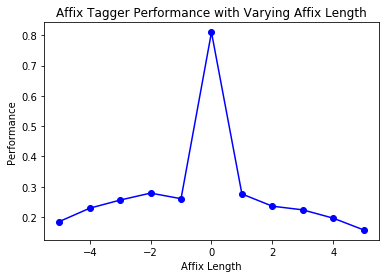

In [53]:
display()

*As you can see, the most accurate length by far is 0, suggesting that the affix tagger is not very effective (at least in English).  If we were to use it, an affix length of -2 appears to be slightly more effective than other lengths.*

##### 12. 

☼ Train a bigram tagger with no backoff tagger, and run it on some of the training data. Next, run it on some new data. What happens to the performance of the tagger? Why?

In [54]:
size = int(len(brown_tagged_sents) * 0.9)

train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(train_sents)

0.7884137382485832

In [55]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

*It drops precipitously when it sees new data.  As was covered in the chapter, bigrams depend entirely on the tag of the first word in the bigram.  If the tag for the first word is `None`, then the tags for all subsequent words will also be `None`.*

##### 13.

☼ We can use a dictionary to specify the values to be substituted into a formatting string. Read Python's library documentation for formatting strings  and use this method to display today's date in two different formats.

*The link in the book is dead.*

In [56]:
date = {'month': '11', 'date': '06', 'day': 'Wednesday', 'year': '2019'}

print("European style: {}, {}.{}.{}".format(date['day'], date['date'], 
                                            date['month'], date['year']))
print("American style: {}, {}/{}/{}".format(date['day'], date['month'],
                                            date['date'], date['year']))
print("Asian style: {}, {}.{}.{}".format(date['day'], date['year'],
                                         date['month'], date['date']))

European style: Wednesday, 06.11.2019
American style: Wednesday, 11/06/2019
Asian style: Wednesday, 2019.11.06


##### 14.

◑ Use `sorted()` and `set()` to get a sorted list of tags used in the Brown corpus, removing duplicates.

In [57]:
print(sorted(set([t for (_, t) in brown.tagged_words()])), end = '')

["'", "''", '(', '(-HL', ')', ')-HL', '*', '*-HL', '*-NC', '*-TL', ',', ',-HL', ',-NC', ',-TL', '--', '---HL', '.', '.-HL', '.-NC', '.-TL', ':', ':-HL', ':-TL', 'ABL', 'ABN', 'ABN-HL', 'ABN-NC', 'ABN-TL', 'ABX', 'AP', 'AP$', 'AP+AP-NC', 'AP-HL', 'AP-NC', 'AP-TL', 'AT', 'AT-HL', 'AT-NC', 'AT-TL', 'AT-TL-HL', 'BE', 'BE-HL', 'BE-TL', 'BED', 'BED*', 'BED-NC', 'BEDZ', 'BEDZ*', 'BEDZ-HL', 'BEDZ-NC', 'BEG', 'BEM', 'BEM*', 'BEM-NC', 'BEN', 'BEN-TL', 'BER', 'BER*', 'BER*-NC', 'BER-HL', 'BER-NC', 'BER-TL', 'BEZ', 'BEZ*', 'BEZ-HL', 'BEZ-NC', 'BEZ-TL', 'CC', 'CC-HL', 'CC-NC', 'CC-TL', 'CC-TL-HL', 'CD', 'CD$', 'CD-HL', 'CD-NC', 'CD-TL', 'CD-TL-HL', 'CS', 'CS-HL', 'CS-NC', 'CS-TL', 'DO', 'DO*', 'DO*-HL', 'DO+PPSS', 'DO-HL', 'DO-NC', 'DO-TL', 'DOD', 'DOD*', 'DOD*-TL', 'DOD-NC', 'DOZ', 'DOZ*', 'DOZ*-TL', 'DOZ-HL', 'DOZ-TL', 'DT', 'DT$', 'DT+BEZ', 'DT+BEZ-NC', 'DT+MD', 'DT-HL', 'DT-NC', 'DT-TL', 'DTI', 'DTI-HL', 'DTI-TL', 'DTS', 'DTS+BEZ', 'DTS-HL', 'DTX', 'EX', 'EX+BEZ', 'EX+HVD', 'EX+HVZ', 'EX+MD', '

##### 15.

Write programs to process the Brown Corpus and find answers to the following questions:

* 1. Which nouns are more common in their plural form, rather than their singular form? (Only consider regular plurals, formed with the -s suffix.)

* 2. Which word has the greatest number of distinct tags. What are they, and what do they represent?

* 3. List tags in order of decreasing frequency. What do the 20 most frequent tags represent?

* 4. Which tags are nouns most commonly found after? What do these tags represent?

*Part 1:*

In [58]:
# create set of all singular nouns in the Brown Corpus

sing_nouns = set(word.lower() for (word, tag) in \
                              nltk.corpus.brown.tagged_words() \
                              if tag == 'NN')

In [59]:
# create set of all plural nouns in the Brown Corpus

plur_nouns = set([word.lower() for (word, tag) in nltk.corpus.brown.tagged_words() if tag == 'NNS'])


In [60]:
# make a list of words that have regular plurals represented in plur_nouns

cands = [n for n in sing_nouns if n + "s" in plur_nouns]

In [61]:
# get FreqDist for singular nouns
snfd = nltk.FreqDist(word.lower() for (word, _) in nltk.corpus.brown.tagged_words() \
                   if word in sing_nouns)

In [62]:
# get FreqDist for plural nouns
pnfd = nltk.FreqDist(word.lower() for (word, _) in nltk.corpus.brown.tagged_words() \
                   if word in plur_nouns)

In [63]:
# find out which words are more common in the plural form
more_common_plur = [(pnfd[c + 's'], c + 's', snfd[c], c) for c in cands \
                    if pnfd[c + 's'] > snfd[c]]

In [64]:
sorted(more_common_plur, reverse = True)[:20]

[(943, 'years', 649, 'year'),
 (391, 'eyes', 119, 'eye'),
 (361, 'things', 331, 'thing'),
 (312, 'members', 133, 'member'),
 (291, 'means', 199, 'mean'),
 (269, 'words', 261, 'word'),
 (204, 'students', 109, 'student'),
 (193, 'minutes', 54, 'minute'),
 (188, 'months', 130, 'month'),
 (179, 'conditions', 89, 'condition'),
 (173, 'hours', 145, 'hour'),
 (169, 'miles', 42, 'mile'),
 (160, 'terms', 79, 'term'),
 (150, 'friends', 125, 'friend'),
 (138, 'methods', 137, 'method'),
 (125, 'sales', 44, 'sale'),
 (115, 'arms', 91, 'arm'),
 (106, 'leaders', 69, 'leader'),
 (103, 'elements', 52, 'element'),
 (102, 'factors', 71, 'factor')]

*Part 2:*

In [65]:
from collections import defaultdict

# create a ConditionalFreqDist with all the words in the corpus,
# with counts of each of their tags
dt = nltk.ConditionalFreqDist(brown.tagged_words())

# create a dictionary where the keys will be the number of distinct tags
tags = defaultdict(list)
for w in set(brown.words()):
    tags[len(dt[w])].append(w)

In [66]:
# word with the most tags
max(tags)

12

In [67]:
tags[12]

['that']

*For the lower numbers, the values should be a list of distinct words.  Let's make sure that's the case:*

In [68]:
print(tags[7], end = '')

['it', 'Chinese', 'well', 'I', 'as', 'That', 'for', 'fit', 'out', 'Little', 'Long', 'home']

*Looking at the tags for 'that':*

In [69]:
dt['that']

FreqDist({'CS': 6419, 'DT': 1975, 'WPS': 1638, 'WPO': 135, 'QL': 54, 'DT-NC': 6, 'WPS-NC': 3, 'CS-NC': 2, 'WPS-HL': 2, 'CS-HL': 1, ...})

*Finding out what each of those tags means:*

In [70]:
for tag in dt['that']:
    nltk.help.brown_tagset(tag)

CS: conjunction, subordinating
    that as after whether before while like because if since for than altho
    until so unless though providing once lest s'posin' till whereas
    whereupon supposing tho' albeit then so's 'fore
WPS: WH-pronoun, nominative
    that who whoever whosoever what whatsoever
DT: determiner/pronoun, singular
    this each another that 'nother
QL: qualifier, pre
    well less very most so real as highly fundamentally even how much
    remarkably somewhat more completely too thus ill deeply little overly
    halfway almost impossibly far severly such ...
WPO: WH-pronoun, accusative
    whom that who
No matching tags found.
No matching tags found.
No matching tags found.
No matching tags found.
No matching tags found.
No matching tags found.
No matching tags found.


*Interestingly, over half of the tags have no description in the documentation. After a little research, I found that -NC designates a cited word; -HL designates a headline; and -TL designates a title.  If we eliminate these tags (since a conjunction in an article and a conjunction in a title are essentially the same thing), which get considerably differenct counts:*

In [71]:
import re, copy
bts_copy = copy.deepcopy(brown.tagged_words())
bts_copy = [(word, re.sub(r'-HL$|-NC$|-TL$', '', tag)) for word, tag in bts_copy]

In [72]:
# using the same methods as above

dt2 = nltk.ConditionalFreqDist(bts_copy)
tags2 = defaultdict(list)
for w in set(w.lower() for w in brown.words()):
    tags2[len(dt2[w])].append(w)
    
max(tags2)

6

In [73]:
tags2[6]

['well', 'that', ':', 'beat', 'still']

In [74]:
dt2['that']

FreqDist({'CS': 6422, 'DT': 1981, 'WPS': 1643, 'WPO': 136, 'QL': 54, 'NIL': 1})

In [75]:
for tag in dt2['that']:
    nltk.help.brown_tagset(tag)

CS: conjunction, subordinating
    that as after whether before while like because if since for than altho
    until so unless though providing once lest s'posin' till whereas
    whereupon supposing tho' albeit then so's 'fore
WPS: WH-pronoun, nominative
    that who whoever whosoever what whatsoever
DT: determiner/pronoun, singular
    this each another that 'nother
QL: qualifier, pre
    well less very most so real as highly fundamentally even how much
    remarkably somewhat more completely too thus ill deeply little overly
    halfway almost impossibly far severly such ...
WPO: WH-pronoun, accusative
    whom that who
No matching tags found.


*Part 3:*

In [76]:
tags = [tags for _, tags in brown.tagged_words()]

ft = nltk.FreqDist(tags)

In [77]:
print(ft.most_common(100), end = '')

[('NN', 152470), ('IN', 120557), ('AT', 97959), ('JJ', 64028), ('.', 60638), (',', 58156), ('NNS', 55110), ('CC', 37718), ('RB', 36464), ('NP', 34476), ('VB', 33693), ('VBN', 29186), ('VBD', 26167), ('CS', 22143), ('PPS', 18253), ('VBG', 17893), ('PP$', 16872), ('TO', 14918), ('PPSS', 13802), ('CD', 13510), ('NN-TL', 13372), ('MD', 12431), ('PPO', 11181), ('BEZ', 10066), ('BEDZ', 9806), ('AP', 9522), ('DT', 8957), ('``', 8837), ("''", 8789), ('QL', 8735), ('VBZ', 7373), ('BE', 6360), ('RP', 6009), ('WDT', 5539), ('HVD', 4895), ('*', 4603), ('WRB', 4509), ('BER', 4379), ('JJ-TL', 4107), ('NP-TL', 4019), ('HV', 3928), ('WPS', 3924), ('--', 3405), ('BED', 3282), ('ABN', 3010), ('DTI', 2921), ('PN', 2573), ('NP$', 2565), ('BEN', 2470), ('DTS', 2435), ('HVZ', 2433), (')', 2273), ('(', 2264), ('NNS-TL', 2226), ('EX', 2164), ('JJR', 1958), ('OD', 1935), ('NR', 1566), (':', 1558), ('NN$', 1480), ('IN-TL', 1477), ('NN-HL', 1471), ('DO', 1353), ('NPS', 1275), ('PPL', 1233), ('RBR', 1182), ('DOD'

In [78]:
for tag, _ in ft.most_common(20):
    nltk.help.brown_tagset(tag)

NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...
IN: preposition
    of in for by considering to on among at through with under into
    regarding than since despite according per before toward against as
    after during including between without except upon out over ...
AT: article
    the an no a every th' ever' ye
JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate ambiguous grand clerical effective
    orderly federal foster general proportionate ...
.: sentence terminator
    . ? ; ! :
,: comma
    ,
NNS: noun, plural, common
    irregularities presentments thanks reports voters laws legislators
    years areas adjustments chambers $100 bonds courts sales details raises
    sessions members congressmen votes polls calls ...
CC

*Part 4:*

In [79]:
wtp = nltk.bigrams(brown.tagged_words())
np = [a[1] for (a, b) in wtp if b[1].startswith('NN')]
fd = nltk.FreqDist(np)
prec_tags = [tag for (tag, _) in fd.most_common(20)]
print(prec_tags, end = '')

['AT', 'JJ', 'IN', 'NN', 'PP$', 'CC', 'CD', 'AP', 'DT', 'VBG', ',', 'VBN', '.', 'NN-TL', 'JJ-TL', 'VB', 'NP', 'NP-TL', 'CS', 'NP$']

In [80]:
for tag in prec_tags:
    nltk.help.brown_tagset(tag)

AT: article
    the an no a every th' ever' ye
JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate ambiguous grand clerical effective
    orderly federal foster general proportionate ...
IN: preposition
    of in for by considering to on among at through with under into
    regarding than since despite according per before toward against as
    after during including between without except upon out over ...
NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...
PP$: determiner, possessive
    our its his their my your her out thy mine thine
CC: conjunction, coordinating
    and or but plus & either neither nor yet 'n' and/or minus an'
CD: numeral, cardinal
    two one 1 four 2 1913 71 74 637 1937 8 five three million 87-31 29-5
    seven 

##### 16. 

◑ Explore the following issues that arise in connection with the lookup tagger:

* a. What happens to the tagger performance for the various model sizes when a backoff tagger is omitted?

* b. Consider the curve in [4.2](https://www.nltk.org/book/ch05.html#fig-tag-lookup); suggest a good size for a lookup tagger that balances memory and performance. Can you come up with scenarios where it would be preferable to minimize memory usage, or to maximize performance with no regard for memory usage?

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import brown

def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model = lt)
    return baseline_tagger.evaluate(brown.tagged_sents(categories = 'news'))

def performance_w_bo(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model = lt, 
                                         backoff = nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories = 'news'))

def display():
    word_freqs = nltk.FreqDist(brown.words(categories = 'news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories = 'news'))
    sizes = 2 ** np.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    perfs_bo = [performance_w_bo(cfd, words_by_freq[:size]) for size in sizes]
    plt.plot(sizes, perfs, '-bo', label = 'without backoff')
    plt.plot(sizes, perfs_bo, '--ro', label = 'with backoff')
    plt.title('Lookup Tagger Performance with Varying Model Size')
    plt.xlabel('Model Size')
    plt.ylabel('Performance')
    plt.legend(loc = 'lower right')
    plt.show()

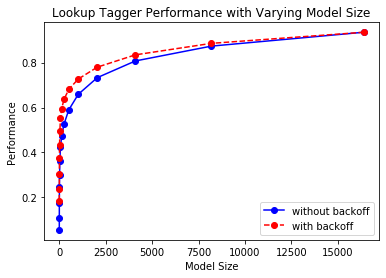

In [82]:
display()

* <i>a. The performance with or without backoff is quite similar. Both taggers plateau at a model size of about 4,000 words and top out at the same location at just over 16,000 words, though the curve is shallower without backoff.  Naturally, the tagger tends to perform better with backoff.</i>

* <i>b. A good size would be around 4,000 words.  The balance between memory and performance is not as acute today in the era of big data, where machines with multi-GB RAM and processors with multiple cores are the norm.  

##### 17.

◑ What is the upper limit of performance for a lookup tagger, assuming no limit to the size of its table? (Hint: write a program to work out what percentage of tokens of a word are assigned the most likely tag for that word, on average.)

*It appears that the upper limit would be around 95%.  Below is code that will sum the number of words in the Brown Corpus tagged with each word's most likely tag (n.b. that I use the `.startswith()` method, because many tags have a suffix such as `-TL` or `-HL`), divided by the total number of word types in the corpus.  Notice that the limit is dependant on the corpus: the Penn Treebank has a slightly higher limit.*

In [83]:
# Brown Corpus

cfd = nltk.ConditionalFreqDist(brown.tagged_words())

sum([tag.startswith(cfd[word].max()) for word, tag in \
     brown.tagged_words()]) / len(brown.tagged_words())

0.9360054151251472

In [84]:
# Penn Treebank

wsj = nltk.corpus.treebank.tagged_words()
cfd = nltk.ConditionalFreqDist(wsj)
sum([tag == cfd[word].max() for word, tag in wsj]) / len(wsj)

0.9599705987524335

##### 18.

◑ Generate some statistics for tagged data to answer the following questions:

* a. What proportion of word types are always assigned the same part-of-speech tag?

* b. How many words are ambiguous, in the sense that they appear with at least two tags?

* c. What percentage of word _tokens_ in the Brown Corpus involve these ambiguous words?

*a. Getting rid of tag "suffixes".  I.e., `-HL`, `-NC`, and `-TL` suffixes applied to some tags in the Brown Corpus:*

In [85]:
import re, copy
bts_copy = copy.deepcopy(brown.tagged_words())
bts_copy = [(word, re.sub(r'-HL$|-NC$|-TL$', '', tag)) for word, tag in bts_copy]

In [86]:
cfd = nltk.ConditionalFreqDist(bts_copy)

*Now creating a dictionary where the keys will be the number of distinct tags:*

In [87]:
tags = defaultdict(list)
for w in set(w.lower() for w, _ in bts_copy):
    tags[len(cfd[w])].append(w)

In [88]:
one_tag = len(tags[1]); one_tag

33948

In [89]:
word_types = len(set(w.lower() for w, _ in bts_copy)); word_types

49815

In [90]:
one_tag / word_types

0.6814814814814815

*b. The number of ambiguous words is simply the number of word types minus the number of words with one tag:*

In [91]:
word_types - one_tag

15867

*c. Since dictionaries have much faster look-up times than lists, we'll create another dictionary with all the words that have more than one tag.  Then we'll simply iterate through all the words, make a tally of those with keys in the new dictionary, and divide this tally by the total number of tokens in the corpus:*

In [92]:
ambiguous = {}
for w in set(w.lower() for w, _ in bts_copy):
    if len(cfd[w]) >= 2:
        ambiguous[w] = ''
    

In [93]:
sum([w.lower() in ambiguous for w in brown.words()]) / len(brown.words())

0.5946579032580314

##### 19. 

◑ The `evaluate()` method works out how accurately the tagger performs on this text. For example, if the supplied tagged text was `[('the', 'DT'), ('dog', 'NN')]` and the tagger produced the output `[('the', 'NN'), ('dog', 'NN')]`, then the score would be `0.5`. Let's try to figure out how the evaluation method works:

* a. A tagger `t` takes a list of words as input, and produces a list of tagged words as output. However, `t.evaluate()` is given correctly tagged text as its only parameter. What must it do with this input before performing the tagging?

* b. Once the tagger has created newly tagged text, how might the `evaluate()` method go about comparing it with the original tagged text and computing the accuracy score?

* c. Now examine the source code to see how the method is implemented. Inspect `nltk.tag.api.__file__` to discover the location of the source code, and open this file using an editor (be sure to use the `api.py` file and not the compiled `api.pyc` binary file).

*The `.evaluate()` method would need to extract the tags from the correctly tagged text and populate a list with them.  It could then create a list of tags produced by the tagger `t`, and calculate what percentage of the two lists are identical.*

*I was able to find and open `tag\api.py` without any problems.  However, examining the file wasn't very beneficial, as most of the work is done "under the hood" via a number of methods that haven't been covered: i.e., `chain`, a function from the `itertools` library that flattens and concatenates lists; and `accuracy`, a function from `nltk.metrics` that calculates what percentage of two lists are the same.*

*I'm all for examining code in more detail; but if the authors are explicitly asking us to do so, it would be more beneficial to look at functions where the bulk of the work is being done within the function, and not via outside helper functions.*

##### 20.

◑ Write code to search the Brown Corpus for particular words and phrases according to tags, to answer the following questions:

* a. Produce an alphabetically sorted list of the distinct words tagged as `MD`.

* b. Identify words that can be plural nouns or third person singular verbs (e.g. <i>deals</i>, <i>flies</i>).

* c. Identify three-word prepositional phrases of the form IN + DET + NN (eg. <i>in the lab</i>).

* d. What is the ratio of masculine to feminine pronouns?


*a.*

In [94]:
print(sorted(set([w.lower() for w, t in brown.tagged_words() if t == 'MD'])), 
      end = '')

["c'n", 'can', 'colde', 'could', 'dare', 'kin', 'maht', 'mai', 'may', 'maye', 'mayst', 'might', 'must', 'need', 'ought', 'shall', 'should', 'shuld', 'shulde', 'wil', 'will', 'wilt', 'wod', 'wold', 'wolde', 'would']

*b.*

In [95]:
cfd = nltk.ConditionalFreqDist(brown.tagged_words())

In [96]:
NNS_VBZ = set([w for w in set(w.lower() for w, t in brown.tagged_words()) \
               if 'NNS' in cfd[w] and 'VBZ' in cfd[w]])

In [97]:
print(NNS_VBZ, end = '')

{'pulls', 'burns', 'issues', 'seals', 'regrets', 'matches', 'searches', 'hopes', 'dwarfs', 'lifts', 'orders', 'places', 'arches', 'switches', 'snows', 'works', 'butts', 'associates', 'spans', 'hates', 'attributes', 'permits', 'winds', 'limits', 'hauls', 'attacks', 'fits', 'bases', 'records', 'rises', 'measures', 'glories', 'wishes', 'respects', 'speeds', 'accounts', 'supplies', 'passes', 'dictates', 'contrasts', 'controls', 'surveys', 'exhibits', 'tastes', 'photographs', 'numbers', 'cracks', 'hints', 'jumps', 'reports', 'fashions', 'mounts', 'advances', 'assaults', 'favors', 'bargains', 'attempts', 'scans', 'damages', 'marches', 'conducts', 'blueprints', 'solos', 'sounds', 'kicks', 'factors', 'lays', 'sums', 'worries', 'struggles', 'rates', 'hits', 'sketches', 'displays', 'meets', 'encounters', 'harbors', 'bodies', 'states', 'crosses', 'rallies', 'charges', 'honors', 'deeds', 'demands', 'clouds', 'protests', 'wants', 'appeals', 'labors', 'ties', 'dogs', 'guarantees', 'splashes', 'revie

*c. The instructions for this are somewhat misleading: in the Brown Corpus, determiners and articles have different tags.  Articles (such as 'the' in the example "in the lab") would be tagged `AT`, whereas determiners (such as this, some, these, etc...) would be tagged `DT|DTI|DTS`. In any case, there is no `DET` tag in the Brown Corpus. Either the authors are trying to be tricky, or were just careless when they composed this question.*

In [98]:
three_word_pp = [(w1, w2, w3) for sent in brown.tagged_sents()\
                 for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sent)\
                 if t1.startswith('IN') and \
                 (t2.startswith('DT') or t2 == 'AT') and t3.startswith('NN')]

In [99]:
print(three_word_pp[:50], end = '')

[('of', 'the', 'election'), ('of', 'the', 'City'), ('for', 'the', 'manner'), ('in', 'the', 'election'), ('of', 'this', 'city'), ('to', 'the', 'end'), ('on', 'a', 'number'), ('of', 'the', 'law'), ('at', 'the', 'State'), ('through', 'the', 'welfare'), ('in', 'the', 'state'), ('with', 'the', 'exception'), ('of', 'this', 'money'), ('of', 'these', 'funds'), ('in', 'the', 'future'), ('in', 'the', 'appointment'), ('in', 'a', 'manner'), ('of', 'the', 'concessionaires'), ('for', 'the', 'purpose'), ('at', 'the', 'jail'), ('for', 'the', 'mayor'), ('than', 'a', 'year'), ('on', 'the', 'petition'), ('from', 'the', 'audience'), ('for', 'a', 'state'), ('of', 'the', 'voters'), ('in', 'each', 'county'), ('under', 'the', 'county'), ('for', 'some', 'time'), ('of', 'the', 'highway'), ('of', 'the', 'number'), ('in', 'the', 'session'), ('to', 'the', 'state'), ('of', 'the', 'act'), ('with', 'a', 'battle'), ('in', 'the', 'Legislature'), ('against', 'the', 'issuance'), ('about', 'the', 'plans'), ('in', 'the', '

*You could argue that authors meant we should use the `universal` tagset; but that doesn't have an `IN` tag or an `NN` tag.  We'd have to use respectively `ADP` and `NOUN`.  And this gives quite different results:*

In [100]:
three_word_pp = [(w1, w2, w3) for sent in brown.tagged_sents(tagset = 'universal')\
                 for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sent)\
                 if t1 == 'ADP' and t2 == 'DET' and t3 == 'NOUN']

In [101]:
print(three_word_pp[:10], end = '')

[('that', 'any', 'irregularities'), ('that', 'the', 'City'), ('of', 'the', 'election'), ('of', 'the', 'City'), ('for', 'the', 'manner'), ('in', 'the', 'election'), ('of', 'this', 'city'), ('to', 'the', 'end'), ('on', 'a', 'number'), ('of', 'both', 'governments')]

*d. First, we'll get a list of all the pronouns in the corpus.  There are quite a few (more than expected).  Then we'll manually pick out the masculine and feminine pronouns:*

In [102]:
[set(w.lower() for w,t in brown.tagged_words() if t.startswith('PP'))]

[{"'em",
  "'emselves",
  "'im",
  "'tain't",
  "'tis",
  'ah',
  'ahm',
  'dey',
  'em',
  "h'all",
  'he',
  "he'd",
  "he'll",
  "he's",
  'her',
  'hers',
  'herself',
  'him',
  'himself',
  'himselfe',
  'hir',
  'his',
  'hisself',
  'hym',
  'hymselfe',
  'hys',
  'hytt',
  'i',
  "i'd",
  "i'll",
  "i'm",
  "i've",
  'it',
  "it'd",
  "it'll",
  "it's",
  'its',
  'itself',
  'mah',
  'me',
  'mee',
  'mine',
  'my',
  'myn',
  'myne',
  'myself',
  'oneself',
  'our',
  'ours',
  'ourselves',
  'out',
  'ownself',
  'she',
  "she'd",
  "she'll",
  "she's",
  'thay',
  'thee',
  'thei',
  'their',
  "their's",
  'theirs',
  'them',
  'themselves',
  'ther',
  'they',
  "they'd",
  "they'll",
  "they're",
  "they've",
  'thine',
  'thou',
  'thum',
  'thy',
  'u',
  'um',
  'us',
  'we',
  "we'd",
  "we'll",
  "we're",
  "we'uns",
  "we've",
  'wee',
  "y'all",
  "y'know",
  "y'r",
  "y're",
  'ya',
  'ye',
  "ye're",
  'yore',
  'you',
  "you'd",
  "you'll",
  "you're",
  "you

In [103]:
m = ["he'd",  "he'll",  "he's",  "'im",  'he',  'him',  'himself',  'himselfe',  'his',  'hisself',  'hym',  'hymselfe',  'hys']
f = ["she'd",  "she'll",  "she's",  'her',  'hers',  'herself',  'hir',  'she']

*Using the ConditionalFreqDist from above, we can use the syntax below to calculate the number of occurrences for each pronoun:*

In [104]:
cfd["she'd"]

FreqDist({'PPS+MD': 28, 'PPS+HVD': 27})

In [105]:
sum(cfd["she'd"].values())

55

In [106]:
m_values = sum([sum(cfd[mp].values()) for mp in m])
f_values = sum([sum(cfd[fp].values()) for fp in f])

*From this we can calculate that male pronouns are over three times as prevalent than female pronouns in the corpus:*

In [107]:
m_values/f_values

3.2378880759343485

##### 21. 

◑ In [3.1](https://www.nltk.org/book/ch03.html#tab-absolutely) we saw a table involving frequency counts for the verbs *adore*, *love*, *like*, *prefer* and preceding qualifiers *absolutely* and *definitely*. Investigate the full range of adverbs that appear before these four verbs.

In [108]:
wtp = nltk.bigrams(brown.tagged_words())
vp = sorted(set([a[0] for (a, b) in wtp if a[1].startswith('RB') and b[0] in\
     ('adore', 'love', 'like', 'prefer')]))

In [109]:
print(vp, end = '')

['Jist', 'Just', 'Kinda', 'More', 'abreast', 'almost', 'alone', 'always', 'around', 'by', 'close', 'dearly', 'deceptively', 'even', 'exactly', 'generally', 'gloriously', 'here', 'increasingly', 'jist', 'just', 'less', 'more', 'much', 'often', 'particularly', 'quick', 'rather', 'remarkably', 'roughly', 'simply', 'so', 'somewhat', 'spontaneously', 'sure', 'there', 'together', 'wildly', 'yet']

##### 22.

◑ We defined the `regexp_tagger` that can be used as a fall-back tagger for unknown words. This tagger only checks for cardinal numbers. By testing for particular prefix or suffix strings, it should be possible to guess other tags. For example, we could tag any word that ends with *-s* as a plural noun. Define a regular expression tagger (using `RegexpTagger()`) that tests for at least five other patterns in the spelling of words. (Use inline documentation to explain the rules.)

*In section 4.2, we made a `regexp_tagger` that can do a lot more than just check for cardinal numbers.  I have to ask again if the person who authored this question bothered to read the chapter...*

*As I mentioned in the notes for this chapter, using regular expressions as the main tagging method is not recommended, as there are so many exceptions.  But for the sake of practice:*


In [110]:
# adapted from my notes for 4.2

patterns = [
    (r'.*ing$', 'VBG'),                      # gerunds 
    (r'.*ed$', 'VBD'),                       # simple past
    (r'.*es$', 'VBZ'),                       # 3rd singular present
    (r'.*ould$', 'MD'),                      # modals
    (r'.\'s$', 'NN$'),                       # possessive nouns
    (r'.*s$', 'NNS'),                        # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),        # cardinal numbers
    (r'.*ly$|.*wise', 'ADV'),                # adverbs
    
    # adjectives
    (r'.*y$|.*ish$|.*ive$|.*[ai]ble$|.*ful$|.*ous$|.*less', 'JJ'),
    
    (r'^th.{1,3}|^an?$', 'DET'),             # determiners/articles 
    (r'[\.,!\?;:\'\"\(\)\[\]``]', '.'),      # punctuation 
    (r'.*ate$|.*en$|.*fy$|.*i[sz]e$', 'VB'), # verbs, base form
    (r'.*', 'NN')                            # nouns (default)
]

In [111]:
regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(brown.sents(categories = 'news')[3]), end = '')

[('``', '.'), ('Only', 'ADV'), ('a', 'DET'), ('relative', 'JJ'), ('handful', 'JJ'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", '.'), (',', '.'), ('the', 'DET'), ('jury', 'JJ'), ('said', 'NN'), (',', '.'), ('``', '.'), ('considering', 'VBG'), ('the', 'DET'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'DET'), ('election', 'NN'), (',', '.'), ('the', 'DET'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'DET'), ('size', 'VB'), ('of', 'NN'), ('this', 'NNS'), ('city', 'JJ'), ("''", '.'), ('.', '.')]

In [112]:
regexp_tagger.evaluate(brown.tagged_sents(categories = 'news'))

0.23470970821648068

*As I thought, the tagger didn't perform especially well.  For what it's worth, the one class of words with the most distinguishable suffixes is nouns; but since that's the default class, there's no point in crafting regular expressions to isolate them.*

##### 23.

◑ Consider the regular expression tagger developed in the exercises in the previous section. Evaluate the tagger using its `accuracy()` method, and try to come up with ways to improve its performance. Discuss your findings. How does objective evaluation help in the development process?

*This question is very confusingly written.  By the previous section, do they mean the previous question?  Also, there is no `accuracy()` method for taggers: there is an `evaluate()` method, which uses the `accuracy()` method from nltk.metrics.  Furthermore, I think using regular expressions for tagging is extremely ineffective, as I have noted several times.  The only thing I want to add to this answer is that `evaluate()` does provide an objective metric that we can use to verify that one tagger is more effective than another, so we don't have to rely on hunches.*

##### 24. 

◑ How serious is the sparse data problem? Investigate the performance of n-gram taggers as *n* increases from 1 to 6. Tabulate the accuracy score. Estimate the training data required for these taggers, assuming a vocabulary size of $10^5$ and a tagset size of $10^2$.

*The maximum number of possible $n$-grams and possible tag combinations would increase exponentially with the increase in the size of $n$.  In most languages, rules of syntax prohibit a good number of possible combinations (e.g., in English an adjective can't precede an article, etc...); but in any case, the number of possible combinations is so large that we would almost surely never see the vast majority of possible $n$-grams.*


| $n$ =  | Maximum Number of Possible n-grams | Maximum Number of Possible tag combinations |
|:------:|:----------------------------------:|:-------------------------------------------:|
|    1   |               $10^5$               |                    $10^2$                   |
|    2   |               $10^{10}$              |                    $10^4$                   |
|    3   |               $10^{15}$              |                    $10^6$                   |
|    4   |               $10^{20}$              |                    $10^8$                   |
|    5   |               $10^{25}$              |                   $10^{10}$                   |
|    6   |               $10^{30}$              |                   $10^{12}$                   |

*The authors haven't offered much guidance in the amount of training data needed for a tagger.  Usually, anywhere between 90% of the data is used for training and 10% for testing (70/20/10 if a cross-validation model is used to tune parameters), so one could argue that we would need a training set 90% of the size of the maximum number of possible $n$-grams.  A cursory search for corpus size heuristics online failed to generate anything of value.*

*For the sake of illustration, I decided to look at the evaluation rates for uni-, bi-, and trigrams, using various ratios of training/test data.  I started off with a 10/90 train/test split, then tried a 20/80 split, a 30/70 split, etc... As you can see, with a unigram model, the size of the split does not matter as much as it does with larger $n$-grams.  No matter what the size of the train/test split, a unigram model does quite well.  However, with larger n-grams, we do notice a steady increase in accuracy as the training set grows, though the accuracy for bigram and trigram taggers still lags far behind that of a unigram tagger:*

In [113]:
train_size = np.arange(0.1, 1, 0.1)
perfs_uni = []

for ts in train_size:
    size = int(len(brown.tagged_sents()) * ts)
    train_sents = brown.tagged_sents()[:size]
    test_sents = brown.tagged_sents()[size:]
    unigram_tagger = nltk.UnigramTagger(train_sents)
    perfs_uni.append(unigram_tagger.evaluate(test_sents))

In [114]:
perfs_bi = []

for ts in train_size:
    size = int(len(brown.tagged_sents()) * ts)
    train_sents = brown.tagged_sents()[:size]
    test_sents = brown.tagged_sents()[size:]
    bigram_tagger = nltk.BigramTagger(train_sents)
    perfs_bi.append(bigram_tagger.evaluate(test_sents))

In [115]:
perfs_tri = []

for ts in train_size:
    size = int(len(brown.tagged_sents()) * ts)
    train_sents = brown.tagged_sents()[:size]
    test_sents = brown.tagged_sents()[size:]
    trigram_tagger = nltk.TrigramTagger(train_sents)
    perfs_tri.append(trigram_tagger.evaluate(test_sents))

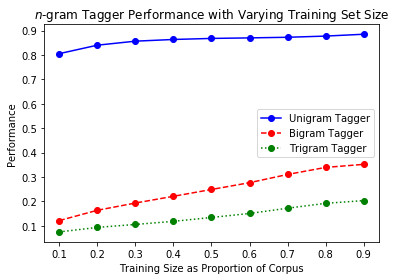

In [116]:
plt.plot(train_size, perfs_uni, '-bo', label = 'Unigram Tagger')
plt.plot(train_size, perfs_bi, '--ro', label = 'Bigram Tagger')
plt.plot(train_size, perfs_tri, ':go', label = 'Trigram Tagger')
plt.title('$n$-gram Tagger Performance with Varying Training Set Size')
plt.xlabel('Training Size as Proportion of Corpus')
plt.ylabel('Performance')
plt.legend(loc = 'best')
plt.show()

*This is a very naïve assumption, but if accuracy improved at a constant rate, the bigram tagger would approach 80% if the corpus were three times as large.  Right now, the corpus has about a million tokens and 50,000 types (meaning each type appears 20 times on average), and if it were three times as large it would have 3,000,000 tokens.  If the vocabulary had 100,000 types, we could use this (very simplistic) logic to argue that we'd need a corpus of 6,000,000 tokens.*

*For the sake of comparison, I calculated the accuracy of various $n$-gram taggers using a 90/10 training/test split.  As you can see, the performance quickly falls off as we increase the number of $n$-grams.  The upshot is that we shouldn't use larger $n$-gram taggers, unless we have a very large corpus and/or a good backoff tagger.*

In [117]:
len(set(brown.words()))

56057

In [118]:
sum([len(s) for s in train_sents])

1065750

In [119]:
size = int(len(brown.tagged_sents()) * 0.9)
train_sents = brown.tagged_sents()[:size]
test_sents = brown.tagged_sents()[size:]

unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8849353534083527

In [120]:

bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(test_sents)

0.3515747783994468

In [121]:
trigram_tagger = nltk.TrigramTagger(train_sents)
trigram_tagger.evaluate(test_sents)

0.2029714381509189

In [122]:
four_gram_tagger = nltk.tag.sequential.NgramTagger(4, train_sents)
four_gram_tagger.evaluate(test_sents)

0.15251147293644307

In [123]:
five_gram_tagger = nltk.tag.sequential.NgramTagger(5, train_sents)
five_gram_tagger.evaluate(test_sents)

0.1402003310911339

In [124]:
six_gram_tagger = nltk.tag.sequential.NgramTagger(6, train_sents)
six_gram_tagger.evaluate(test_sents)

0.1383667567737474

*But as I've mentioned repeatedly, this is a very simplistic model, and it depends greatly on the language in question.  With languages with a fixed word order (such as English), the corpus could be smaller, as rules of syntax prohibit many part of speech combinations.  However, in languages without such a fixed order, we might need a much larger corpus to encounter examples of all possible collocations.*

##### 25. 

◑ Obtain some tagged data for another language, and train and evaluate a variety of taggers on it. If the language is morphologically complex, or if there are any orthographic clues (e.g. capitalization) to word classes, consider developing a regular expression tagger for it (ordered after the unigram tagger, and before the default tagger). How does the accuracy of your tagger(s) compare with the same taggers run on English data? Discuss any issues you encounter in applying these methods to the language.

*I decided to try looking at some tagged data for Japanese.  There are two corpora available for Japanese through NLTK: the KNB and JEITA corpora.  Details on access are available [here](http://www.nltk.org/howto/japanese.html "Japanese Corpora").*

*Japanese presents a number of problems. The largest one is the writing systems.  There are four in use in modern Japanese (Kanji, Hiragana, Katakana, and Romaji; the [Wikipedia entry](https://en.wikipedia.org/wiki/Japanese_writing_system "Japanese Writing Systme") covers this in much more detail than I am able to here), and most texts use a combination of all four.  There is no concept comparable to upper- and lower-case letters; however, there are heurisitcs for when combinations of the writing systems are used (e.g., words consisting solely of Kanji are most likely nouns; most verbs and adjectives begin with a Kanji character and end with a string of Hiragana characters; etc...), so it might be possible to craft regexp taggers.  However, written Japanese does not use space between words, and I don't have much experience using regular expressions outside of the ASCII range of characters.  So for the moment, I'm going to hold off on trying to use regexp taggers.*


In [125]:
from nltk.corpus import jeita

In [126]:
print(jeita.tagged_sents()[0], end = '')

[('\u3000', '\u3000\t\u3000\t記号-空白'), ('新潟', 'ニイガタ\t新潟\t名詞-固有名詞-地域-一般'), ('の', 'ノ\tの\t助詞-連体化'), ('停車場', 'テイシャジョウ\t停車場\t名詞-一般'), ('を', 'ヲ\tを\t助詞-格助詞-一般'), ('出る', 'デル\t出る\t動詞-自立\t一段\t基本形'), ('と', 'ト\tと\t助詞-接続助詞'), ('列車', 'レッシャ\t列車\t名詞-一般'), ('の', 'ノ\tの\t助詞-連体化'), ('箱', 'ハコ\t箱\t名詞-一般'), ('から', 'カラ\tから\t助詞-格助詞-一般'), ('まけ', 'マケ\tまける\t動詞-自立\t一段\t連用形'), ('出さ', 'ダサ\t出す\t動詞-自立\t五段・サ行\t未然形'), ('れ', 'レ\tれる\t動詞-接尾\t一段\t連用形'), ('た', 'タ\tた\t助動詞\t特殊・タ\t基本形'), ('樣', '\t\t未知語'), ('に', 'ニ\tに\t助詞-格助詞-一般'), ('人々', 'ヒトビト\t人々\t名詞-一般'), ('は', 'ハ\tは\t助詞-係助詞'), ('ぞ', 'ゾ\tぞ\t助詞-係助詞'), ('ろ', 'ロ\tろ\t名詞-一般'), ('／', '／\t／\t記号-一般'), ('＼', '＼\t＼\t記号-一般'), ('と', 'ト\tと\t助詞-格助詞-引用'), ('一方', 'イッポウ\t一方\t名詞-非自立-副詞可能'), ('へ', 'ヘ\tへ\t助詞-格助詞-一般'), ('向い', 'ムイ\t向く\t動詞-自立\t五段・カ行イ音便\t連用タ接続'), ('て', 'テ\tて\t助詞-接続助詞'), ('行く', 'イク\t行く\t動詞-非自立\t五段・カ行促音便\t基本形'), ('。', '。\t。\t記号-句点'), ('其', '\t\t未知語'), ('あと', 'アト\tあと\t名詞-一般'), ('へ', 'ヘ\tへ\t助詞-格助詞-一般'), ('跟', '\t\t未知語'), ('い', 'イ\tいる\t動詞-自立\t一段\t連用形'), ('て', 'テ\tて\t助詞-接続助詞'), ('行く', 'イク\

*The example above shows how a sentence in Japanese is tagged.  Naturally, it's all in Japanese, so it's quite difficult for someone who can't read Japanese to make observations.  One aspect that immediately jumps out is the use of particles in Japanese.  A thorough explanation of Japanese Grammar is not possible here (a [Wikipedia artile](https://en.wikipedia.org/wiki/Japanese_grammar "Japanese Grammar") for those interested); but Japanese uses particles to mark the subject, topic, object, etc... of a sentence, and these could be of great use in tagging a text, since only certain parts of speech can be paired with specific particles.*

*I don't have time to go into the intricacies of Japanese corpora at the moment.  I was more interested in practicing importing a foreign corpus, and examining the tagging process.  Time permitting, I'll return to this at a later date.*

*I used the Jeita corpus, and started off with a unigram tagger, which took a very long time to run.  However, the accuracy was quite high: comparable to what one might expect in English:*

In [127]:
size = int(len(jeita.tagged_sents()) * 0.9)
train_sents = jeita.tagged_sents()[:size]
test_sents = jeita.tagged_sents()[size:]

unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8649382697751626

*The bigram tagger, though, did much, much worse.  I'm not sure if the tagger operated on the character level, or the word level:*

In [128]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(test_sents)

0.06625315567675989

*Also surprising to me was how badly the affix tagger did.  In Japanese, a word's suffix is extremely indicative of its part of speech, so I believed an affix tagger would do quite well.  But it in fact did very poorly.  It also runs very slowly.*

In [129]:
affix_tagger = nltk.AffixTagger(jeita.tagged_sents(), affix_length = -1)
affix_tagger.evaluate(jeita.tagged_sents())

0.020517766874928366

In [130]:
affix_tagger = nltk.AffixTagger(jeita.tagged_sents(), affix_length = -2)
affix_tagger.evaluate(jeita.tagged_sents())

0.018020838870710074

In [131]:
affix_tagger = nltk.AffixTagger(jeita.tagged_sents(), affix_length = -3)
affix_tagger.evaluate(jeita.tagged_sents())

0.006691250826957604

##### 26.

◑ [4.1](https://www.nltk.org/book/ch05.html#code-baseline-tagger) plotted a curve showing change in the performance of a lookup tagger as the model size was increased. Plot the performance curve for a unigram tagger, as the amount of training data is varied.

*I wasn't aware that this would be asked here, as I did this already in my answer for question 5.24.  For convenience's sake, I replicate the plot here.  Be aware that the plot produced by matplotlib is somewhat deceptive: the plot implies that there's a huge difference in performance between a tagger trained of 10% of a corpus and one trained on 90%; however, performance is actually uniformly good, as it's always in the 80% range for accuracy.*

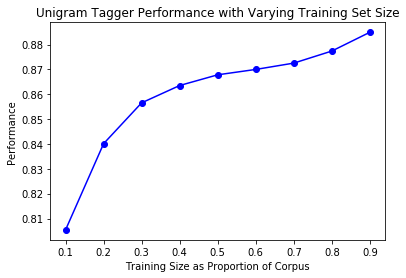

In [132]:
train_size = np.arange(0.1, 1, 0.1)
perfs_uni = []

for ts in train_size:
    size = int(len(brown.tagged_sents()) * ts)
    train_sents = brown.tagged_sents()[:size]
    test_sents = brown.tagged_sents()[size:]
    unigram_tagger = nltk.UnigramTagger(train_sents)
    perfs_uni.append(unigram_tagger.evaluate(test_sents))
    
    
plt.plot(train_size, perfs_uni, '-bo')
plt.title('Unigram Tagger Performance with Varying Training Set Size')
plt.xlabel('Training Size as Proportion of Corpus')
plt.ylabel('Performance')
plt.show()

##### 27. 

◑ Inspect the confusion matrix for the bigram tagger `t2` defined in [5](https://www.nltk.org/book/ch05.html#sec-n-gram-tagging), and identify one or more sets of tags to collapse. Define a dictionary to do the mapping, and evaluate the tagger on the simplified data.

In [133]:
size = int(len(brown.tagged_sents()) * .9)
train_sents = brown.tagged_sents()[:size]
test_sents = brown.tagged_sents()[size:]


t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t2.evaluate(test_sents)

0.9125751765470128

*The output for the confusion matrix example code in the book looked terrible, because the resulting table was much, much, much too large to fit on a single screen.  So to get a more legible matrix, we'll just look at a much smaller sample.  We'll have to choose ten sentences from the test set, since running `t2` on the sentences from the training set will likely generate a 100% match with the `gold_tags`, since the tagger will probably just remember the correct tags.* 

*The rows represent what the tags should be, and the columns what the tagger designated.  In the example below, two nouns were tagged as adjectives, meaning there were two `NN` false positives, and two `JJ` false negatives.*

In [134]:
test_tags = [tag for sent in brown.sents()[size:size + 10]
             for (word, tag) in t2.tag(sent)]
gold_tags = [tag for sent in brown.tagged_sents()[size:size + 10] for (word, tag) in sent]
print(nltk.ConfusionMatrix(gold_tags, test_tags))

     |                    B                                                     P                            |
     |                    E  B  B                    J        N     P  P  P  P  P              V  V  V  V    |
     |  '        A  A  B  D  E  E  C  C  C  D  I  J  J  M  N  N  N  P  P  P  P  S  Q  R  T  V  B  B  B  B  ` |
     |  '  ,  .  P  T  E  Z  R  Z  C  D  S  T  N  J  R  D  N  S  P  $  L  O  S  S  L  B  O  B  D  G  N  Z  ` |
-----+-------------------------------------------------------------------------------------------------------+
  '' | <3> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
   , |  . <8> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
   . |  .  .<11> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
  AP |  .  .  . <1> .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . |
 

*It looks like someone assigned this problem as homework, as I found a solution key [here](https://gawron.sdsu.edu/compling/course_core/comp_ling_assignments/NLTK_tagging_assignment_answer.html "Tagging Assignment Answers").  The solution key included code to pull out the most common errors from the confusion matrix, which I'm including below.  There are two changes: in line 14 I replaced `<>` with `!=`; and I changed to name of the function from `foo` (which isn't very informative) to `top_cm_errors`.  The code is not all that complex, but I wasn't aware of the methods that could be used to go inside of the confusion matrix:*

In [135]:
def confusion_ct(mat, tag1, tag2):
    return mat._confusion[mat._indices[tag1]][mat._indices[tag2]]

def top_cm_errors(mat):
    conf = {}
    num_tags = len(mat._confusion)
    
    for tag1 in mat._indices:
        for tag2 in mat._indices:
            conf[(tag1, tag2)] = confusion_ct(mat, tag1, tag2)
            
    s_il = [((tag1, tag2), ct) for ((tag1, tag2), ct) in 
            sorted(conf.items(), key = lambda x:x[1], reverse = True)
            if tag1 != tag2]
    
    return s_il

In [136]:
test_tags = [tag for sent in brown.sents()[size:]
             for (word, tag) in t2.tag(sent)]
gold_tags = [tag for sent in brown.tagged_sents()[size:] for (word, tag) in sent]
cm = nltk.ConfusionMatrix(gold_tags, test_tags)

In [137]:
print(top_cm_errors(cm)[:50], end = '')

[(('NP', 'NN'), 978), (('IN', 'TO'), 477), (('JJ', 'NN'), 442), (('VBD', 'VBN'), 354), (('VB', 'NN'), 314), (('NNS', 'NN'), 299), (('TO', 'IN'), 281), (('VBN', 'VBD'), 260), (('RP', 'IN'), 225), (('VBG', 'NN'), 188), (('DT', 'CS'), 175), (('NP$', 'NN'), 171), (('PPO', 'PP$'), 141), (('IN', 'RP'), 134), (('NN', 'JJ'), 130), (('CS', 'IN'), 109), (('RB', 'QL'), 105), (('PN', 'CD'), 101), (('RB', 'IN'), 97), (('PP$', 'PPO'), 96), (('RB', 'NN'), 96), (('NN', 'VB'), 95), (('VBN', 'NN'), 94), (('NN-TL', 'NN'), 92), (('QL', 'CS'), 88), (('VBD', 'NN'), 84), (('RB', 'JJ'), 81), (('WPS', 'CS'), 77), (('AP', 'JJ'), 71), (('NP-TL', 'NN'), 65), (('JJ', 'RB'), 64), (('IN', 'CS'), 62), (('PPO', 'PPSS'), 58), (('QL', 'RB'), 57), (('NP', 'NP-TL'), 56), (('IN', 'RB'), 51), (('AP', 'QL'), 50), (('RB', 'AP'), 49), (('UH', 'NN'), 48), (('NPS', 'NN'), 46), (('NN', 'VBG'), 45), (('NP-TL', 'NP'), 45), (('PPS', 'PPO'), 44), (('NNS', 'VBZ'), 42), (('FW-NN', 'NN'), 41), (('CS', 'RB'), 38), (('QL', 'ABN'), 38), ((

*It seems the most common errors are mistaking common classes (e.g., `NN`) for less common ones (e.g., `NP`).  It is definitely not recommended to collapse the more common classes together with the less common ones.  So we have to go through the list until we find some less common classes.  For a while, I was manually choosing tags that I thought might be good candidates for replacement.  But this was tedious, and I decided to try this programmatically, with much better results.  Using the frequency distribution for tag counts from the solution to question 5.15.3, I was able to write code that would determine when a less common tag was mistakenly used in place of a more common one.*

*I was also unsure how to do mapping for this problem until I came across some code [here](https://sourceforge.net/p/nltk/svn/4609/tree//trunk/nltk/doc/en/tag.txt "early NLTK text"), which almost seems to be an early version of the nltk book (it appears to have the same authors).  I had tried to create a new function that would iterate through a tagged list and replace specific tags with more general ones.  But I had no idea how to use `.evaluate` over this.  It appears that we need to collapse the tags over the training and test sets, and then train and evaluate the tagger over these edited sets.*

*Finally, I didn't know how many tags to collapse to get the best results.  My initial assumption was that more collapsed tags would lead to higher accuracy; but that wasn't the case.  I tried different numbers, and discovered than replacing the 50 most commonly mistaken tags lead to the highest level of accuracy:*

In [138]:
perf = []

# number of top_cm_errors to collapse
trials = [140, 100, 80, 60, 50, 40, 30, 20, 10, 5]

size = int(len(brown.tagged_sents()) * .9)
train_sents = brown.tagged_sents()[:size]
test_sents = brown.tagged_sents()[size:]

for trial in trials:
    
    # create a new mapping of tags to be collapsed for each trial
    new_mappings = {}

    # if the first tag (what the tag should have been) is more common 
    # than the second (how the word was mistakenly labeled), 
    # collapse the second
    for tags, errors in top_cm_errors(cm)[:trial]:
        if ft[tags[0]] > ft[tags[1]]:
            new_mappings[tags[1]] = tags[0]
            
    # training and test sets have to be re-initialized for each trial
    
    new_train_sents = [[(word[0], new_mappings.get(word[1], word[1]))] for sent in train_sents for word in sent ]
    new_test_sents = [[(word[0], new_mappings.get(word[1], word[1]))] for sent in test_sents for word in sent ]
    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(new_train_sents, backoff = t0)
    t2 = nltk.BigramTagger(new_train_sents, backoff = t1)
    perf.append(t2.evaluate(new_test_sents))
    
    

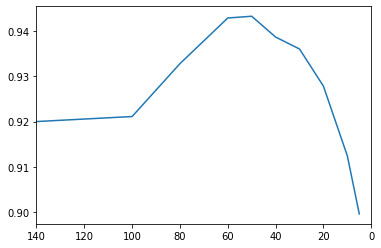

In [139]:
plt.plot(trials, perf)
plt.xlim(140, 0)
plt.show()

In [140]:
perf

[0.92000377192431,
 0.9211143940822698,
 0.9327864043083758,
 0.9428658242702375,
 0.9432534942687706,
 0.9386643196915404,
 0.9360239726745039,
 0.9278200373001404,
 0.9124284906016219,
 0.8996144255149724]

##### 28.

◑ Experiment with taggers using the simplified tagset (or make one of your own by discarding all but the first character of each tag name). Such a tagger has fewer distinctions to make, but much less information on which to base its work. Discuss your findings.

In [141]:
from nltk.corpus import brown


size = int(len(brown.tagged_sents()) * .9)
train_sents = brown.tagged_sents(tagset = 'universal')[:size]
test_sents = brown.tagged_sents(tagset = 'universal')[size:]


t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t2.evaluate(test_sents)

0.9245510362314285

*Using the unmodified tagset produces an accuracy rate of 0.9125751765470128.  We could say that the accuracy rate has gone up by 1%, which seems small.  Or we could say that the rate of error has decreased by 14%, which seems much more significant:*

In [142]:
1 - (1 - 0.9245510362314285) / (1 - 0.9125751765470128) 

0.13698465963566697

*Getting tags for Brown Corpus:*

In [143]:
from nltk.data import load

tagdict = load('help/tagsets/brown_tagset.pickle')
brown_tags = [item for item in tagdict.keys()]
print(brown_tags, end = "")

['DOZ*', 'FW-AT+NP', 'NP$', 'AP$', 'VBN', 'VBD', 'VBG', 'DO+PPSS', 'WRB+BEZ', 'VBZ', 'WQL', 'WRB+IN', 'WRB+BER', 'DT', 'FW-AT+NN', 'WP$', 'DO', 'FW-UH', 'PPSS+HVD', 'RB$', 'VB', ')', 'VB+AT', 'FW-JJT', 'FW-JJR', 'AP+AP', 'VBG+TO', 'RBR', 'BER', 'WPO', 'FW-VBZ', 'PN$', 'VBN+TO', 'FW-VBG', 'TO', 'FW-VBD', 'FW-RB', 'VB+IN', 'FW-VBN', 'DOD*', 'CS', 'NN+IN', 'RB', 'FW-NR', 'HV+TO', 'FW-NP', 'WRB+DOD*', 'FW-RB+CC', 'DTS+BEZ', 'CC', 'CD', 'NPS', 'RBR+CS', 'PN+BEZ', 'FW-*', 'NP+MD', 'MD+HV', 'RB+BEZ', 'NR$', 'NR', 'NP', 'PPSS+VB', 'FW-IN+AT', 'FW-VB', 'WPS+BEZ', 'NN', 'CD$', 'MD*', 'WRB+DO', 'WDT+HVZ', 'PPSS', 'FW-CC', 'HV*', 'FW-BER', '(', ',', 'NN+NN', 'FW-TO+VB', 'FW-PPL+VBZ', 'NP+BEZ', 'BEDZ', 'HVZ', 'ABX', 'FW-DTS', 'VB+VB', 'PN+MD', 'BED*', 'JJT', 'FW-PPO+IN', 'HVN', 'ABN', 'JJR', 'JJS', 'MD', 'NN+BEZ', 'HVG', 'HVD', 'WDT+DOD', 'FW-QL', 'EX+HVZ', 'WPS+HVD', 'PPS+MD', 'FW-PN', 'BEM*', 'EX+MD', 'BEDZ*', 'WPS+HVZ', 'FW-WPO', 'EX+HVD', 'NN+MD', 'FW-WPS', 'WRB+MD', 'EX+BEZ', 'PPSS+HV', 'FW-IN

*Creating very simplified tagset: Just using first letter of old tags.*

In [144]:
simplified_mappings = {}

for tag in brown_tags:
    simplified_mappings[tag] = tag[0]

In [145]:


new_train_sents = [[(word[0], simplified_mappings.get(word[1], word[1]))] for sent in train_sents for word in sent ]
new_test_sents = [[(word[0], simplified_mappings.get(word[1], word[1]))] for sent in test_sents for word in sent ]
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(new_train_sents, backoff = t0)
t2 = nltk.BigramTagger(new_train_sents, backoff = t1)
t2.evaluate(new_test_sents)

0.9156346262651662

*This extremely simplified tagset is only marginally better.  It only produces 3% fewer errors.*

In [146]:
1 - (1 - 0.9156346262651662) / (1 - 0.9125751765470128) 

0.034995206136145485

##### 29.

◑ Recall the example of a bigram tagger which encountered a word it hadn't seen during training, and tagged the rest of the sentence as None. It is possible for a bigram tagger to fail part way through a sentence even if it contains no unseen words (even if the sentence was used during training). In what circumstance can this happen? Can you write a program to find some examples of this?

*To find examples of this, we'll forgo the test/train split and train a bigram tagger on the entire Brown Corpus, and then run the tagger over a random sentence from the corpus.  In this way, we can guarantee that all the words - as well as all the bigrams - in the test sentence will have already been seen by the bigram tagger.*

*I then created a program that chooses a sentence at random from the corpus, checks all the tags for two consecutive words tagged `None`, and prints out the sentence if such a tagged bigram is found.  The program then recursively calls itself until $n$ such sentences are printed.*

*While it is clear that bigram taggers can fail even on sentences they've seen in training, what is not obvious is why they fail.  I've queried this problem online and have not been able to come up with a suitable answer.  I could suggest possibilities (e.g., a bigram tagger has to see a phrase $x$ times before it's "confident" it has the right tag), but this is pure speculation, and I really would have appreciated it if the authors had made the answer to this question available somewhere...*

In [147]:
train_sents = brown.tagged_sents()

t0 = nltk.BigramTagger(train_sents)

In [148]:
import random

def find_None(sents, tagger, i = 0, n = 3):
    """
    Prints out sentence if two consecutive words are tagged
    with None.  Will run until $n$ sentences are found.
    
    Arguments:
    
    sents:  An untagged corpus.
    tagger: A trained bigram tagger.
    i:      The number of sentences already printed.
    n:      The target number of sentences to be printed. 
            Default is 3.
    """
    r = random.randint(0, len(sents))
    test_tag = tagger.tag(sents[r])
    for j in range(len(test_tag) - 1):
        if test_tag[j][1] == None and test_tag[j + 1][1] == None:
            print(test_tag, "\n")
            i += 1
            break
            
        
    if i < n:
        find_None(sents, tagger, i)
    

In [149]:
find_None(brown.sents(), t0)

[('that', 'CS'), ('he', 'PPS'), ('personally', 'RB'), ('had', 'HVD'), ('an', 'AT'), ('IQ', 'NP-TL'), ('of', 'IN-TL'), ('141', None), ('and', None), ('was', None), ('currently', None), ('reading', None), ('the', None), ('Mushr', None), ('to', None), ('Ozon', None), ('volume', None), ('of', None), ('the', None), ('encyclopedia', None), ('.', None)] 

[('Many', 'AP'), ('of', 'IN'), ('you', 'PPO'), ('are', 'BER'), ('familiar', 'JJ'), (',', ','), ("I'm", 'PPSS+BEM'), ('sure', 'JJ'), (',', ','), ('with', 'IN'), ('the', 'AT'), ('story', 'NN'), ('of', 'IN'), ('my', 'PP$'), ('early', 'JJ'), ('struggles', 'NNS'), (':', ':'), ('the', 'AT'), ('fire', 'NN'), ('in', 'IN'), ('January', 'NP'), (',', ','), ('1947', 'CD'), (',', ','), ('that', 'CS'), ('destroyed', None), ('everything', None), ('--', None), ('even', None), ('our', None), ('precious', None), ('list', None), ('of', None), ('subscribers', None), ('.', None)] 

[("I'd", 'PPSS+MD'), ('found', None), ('my', None), ('voice', None), ('.', None)]

*This was one of the sentences I found:*

`[('It', 'PPS'), ('is', 'BEZ'), ('sex', 'NN'), ('that', 'CS'), ('obsesses', None), ('them', None), (',', None), ('sex', None), ('that', None), ('is', None), ('at', None), ('the', None), ('basis', None), ('of', None), ('their', None), ('aesthetic', None), ('creed', None), ('.', None)]`

*I tried to find other occurrences of the bigram that caused the tagger to fail, i.e. "that obsesses":*

In [150]:
for s in brown.sents():
    if 'that' and 'obsesses' in s:
        print(s)

['It', 'is', 'sex', 'that', 'obsesses', 'them', ',', 'sex', 'that', 'is', 'at', 'the', 'basis', 'of', 'their', 'aesthetic', 'creed', '.']
['``', 'He', 'was', 'not', 'much', 'older', 'than', 'myself', ',', "''", 'writes', 'the', 'narrator', ',', '``', 'when', 'he', 'began', 'to', 'feel', 'the', 'impact', 'of', 'that', 'human', 'mystery', 'which', 'now', 'obsesses', 'me', ',', 'and', 'which', 'makes', 'me', 'begin', ',', 'perhaps', ',', 'to', 'understand', 'him', "''", '.']


*But it looks like this was the only occurrence in the corpus.  Could it be that taggers fail below a certain threshold?  As mentioned above, I couldn't find any clear answers to this...*

##### 30.

◑ Preprocess the Brown News data by replacing low frequency words with *UNK*, but leaving the tags untouched. Now train and evaluate a bigram tagger on this data. How much does this help? What is the contribution of the unigram tagger and default tagger now?

*First, we'll create a dictionary in which we'll tabulate the counts of all the words in the Brown News data:*

In [151]:
new_freq = {}

for word in brown.words(categories = "news"):
    new_freq[word.lower()] = 1 + new_freq.get(word.lower(), 0)

*Then, as a baseline, we'll calculate how the bigram tagger alone does on the Brown News Data:*

In [152]:
size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
train = brown.tagged_sents(categories = "news")[:size]
test = brown.tagged_sents(categories = "news")[size:]

t0 = nltk.BigramTagger(train)
t0.evaluate(test)

0.10206319146815508

*This is where it gets sticky.  It's not completely clear if we're supposed to preprocess only the training data, or both the training and test data.  I decided to try both, to see what would happen.  I also did not know at what number of occurrences I should be replacing tokens with 'UNK', so I decided to try a range of values and compare their performances.*

*First, I tried to preprocess the training data, and then tested the tagger on unprocessed testing data:*

In [153]:
sizes = [2, 5, 10, 25, 50, 100, 250, 500]
perfs = []

for s in sizes:
    
    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)
        
    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = brown.tagged_sents(categories = "news")[size:]

    t0 = nltk.BigramTagger(train)
    perfs.append(t0.evaluate(test))

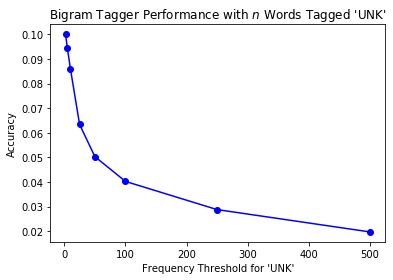

In [154]:
import matplotlib.pyplot as plt

plt.plot(sizes, perfs, '-bo')
plt.title("Bigram Tagger Performance with $n$ Words Tagged 'UNK'")
plt.xlabel("Frequency Threshold for 'UNK'")
plt.ylabel('Accuracy')
plt.show()

*The results are pretty dreadful: The performance is always worse than the bigram tagger working on unprocessed data (which was pretty bad to begin with), and goes steadily downhill.  Upon reflection, this only makes sense: comparing a modified dataset with an unmodified one is going to generate a lot of inconsistencies.*

*Let's try the same thing, only this time generating our training and test splits from the same preprocessed data set:*

In [155]:
sizes = [2, 5, 10, 25, 50, 100, 150, 200, 250]
perfs = []

for s in sizes:
    
    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)
        
    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = bns_copy[size:]

    t0 = nltk.BigramTagger(train)
    perfs.append(t0.evaluate(test))

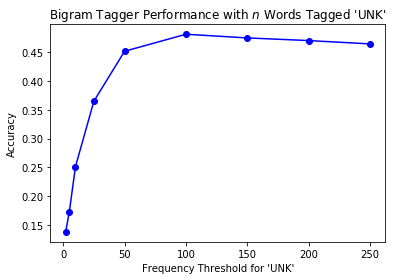

In [156]:
import matplotlib.pyplot as plt

plt.plot(sizes, perfs, '-bo')
plt.title("Bigram Tagger Performance with $n$ Words Tagged 'UNK'")
plt.xlabel("Frequency Threshold for 'UNK'")
plt.ylabel('Accuracy')
plt.show()

*Here, the tagger does much, much better.  If we replace words that occur less than 100 times with 'UNK', the performance of our bigram tagger goes up to nearly 50%, which is considerably better than the approximately 10% it got correct in the beginning.  However, the question now is what percentage of our vocabulary is being replaced by 'UNK'?*

In [157]:
less_than_100 = 0

for _, v in new_freq.items():
    if v <= 100:
        less_than_100 += 1
        
less_than_100

13029

In [158]:
less_than_100/len(new_freq)

0.9936699206833435

*So, to get our high evaluation figures, we've had to replace virtually all of the word types with 'UNK'.  No wonder the tagger is doing so well.  Clearly, accuracy isn't the only thing we should be concerned with.*

*Now, let's repeat the experiment with backoff taggers.  As above, I'll train and test the tagger using respectively a preprocessed and unprocessed data set:*

In [159]:
sizes = [2, 5, 10, 25, 50, 100, 250, 500]
perfs = []

for s in sizes:
    
    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)
        
    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = brown.tagged_sents(categories = "news")[size:]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train, backoff = t0)
    t2 = nltk.BigramTagger(train, backoff = t1)  
    
    perfs.append(t2.evaluate(test))

In [160]:
sizes = [2, 5, 10, 25, 50, 100, 250, 500]
perfs2 = []

for s in sizes:
    
    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)
        
    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = bns_copy[size:]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train, backoff = t0)
    t2 = nltk.BigramTagger(train, backoff = t1)
    perfs2.append(t2.evaluate(test))

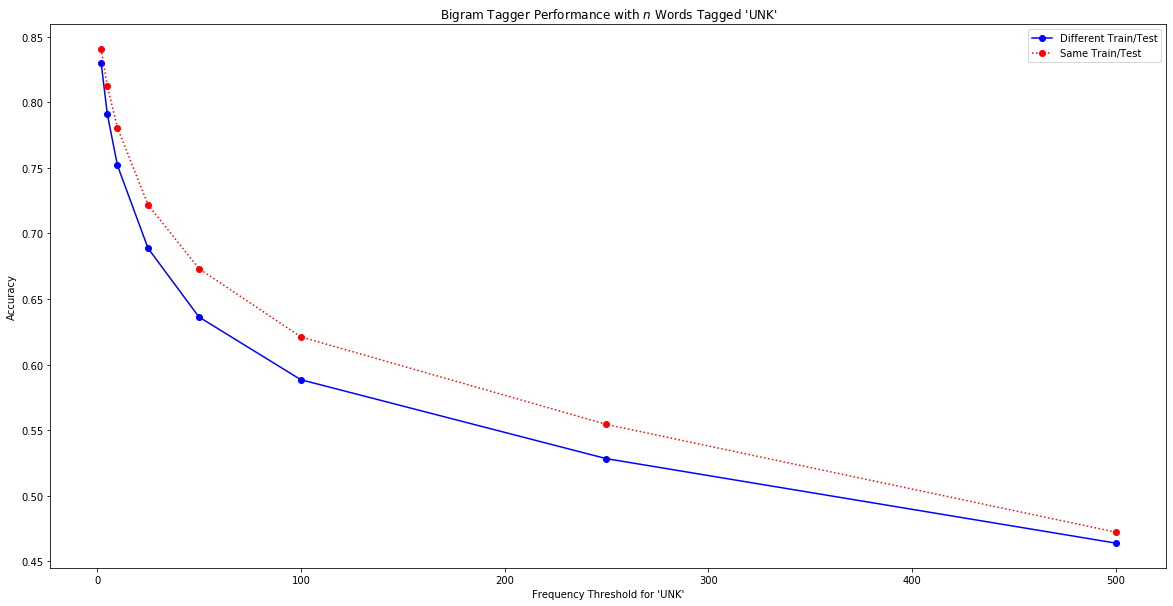

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sizes, perfs, '-bo', label = "Different Train/Test")
plt.plot(sizes, perfs2, ':ro', label = "Same Train/Test")
plt.title("Bigram Tagger Performance with $n$ Words Tagged 'UNK'")
plt.xlabel("Frequency Threshold for 'UNK'")
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

*The plots appear to be very similar.  Let's try again, with smaller numbers for $n$, the threshold at which we replace words with 'UNK':*

In [162]:
import numpy as np

sizes = np.arange(2, 21)
perfs = []

for s in sizes:
    
    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)
        
    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = brown.tagged_sents(categories = "news")[size:]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train, backoff = t0)
    t2 = nltk.BigramTagger(train, backoff = t1)  
    
    perfs.append(t2.evaluate(test))

In [163]:
sizes = np.arange(2, 21)
perfs2 = []

for s in sizes:
    
    bns_copy = []

    for sent in brown.tagged_sents(categories = "news"):
        current = []
        for tagset in sent:
            if new_freq[tagset[0].lower()] <= s:
                current.append(('UNK', tagset[1]))
            else:
                current.append(tagset)
        bns_copy.append(current)
        
    size = int(len(brown.tagged_sents(categories = "news")) * 0.9)
    train = bns_copy[:size]
    test = bns_copy[size:]

    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train, backoff = t0)
    t2 = nltk.BigramTagger(train, backoff = t1)
    perfs2.append(t2.evaluate(test))

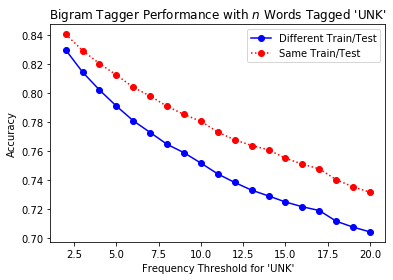

In [164]:
import matplotlib.pyplot as plt

plt.plot(sizes, perfs, '-bo', label = "Different Train/Test")
plt.plot(sizes, perfs2, ':ro', label = "Same Train/Test")
plt.title("Bigram Tagger Performance with $n$ Words Tagged 'UNK'")
plt.xlabel("Frequency Threshold for 'UNK'")
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

*To answer the second part of the question: the backoff taggers are only utilized when the bigram tagger fails to find a tag for a given bigram.  Since this happens less often when part of the corpus is converted to 'UNK', these backoff taggers are used less frequently.*

##### 31. 

Modify the program in [4.1](https://www.nltk.org/book/ch05.html#code-baseline-tagger) to use a logarithmic scale on the x-axis, by replacing `pylab.plot()` with `pylab.semilogx()`. What do you notice about the shape of the resulting plot? Does the gradient tell you anything?

In [165]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model = lt, 
                                         backoff = nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories = 'news'))

import matplotlib.pyplot as plt
import numpy as np

def display():
    word_freqs = nltk.FreqDist(brown.words(categories = 'news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories = 'news'))
    sizes = 2 ** np.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    # replacing plt.plot with plt.semilogx
    plt.semilogx(sizes, perfs, '-bo')
    plt.title('Lookup Tagger Performance with Varying Model Size')
    plt.xlabel('Model Size')
    plt.ylabel('Performance')
    plt.show()
    
    

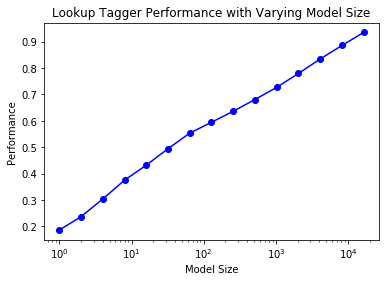

In [166]:
display()

*The resulting plot is nearly a straight line, which is strong evidence of a definite power relationship.*

##### 32. 

◑ Consult the documentation for the Brill tagger demo function, using `help(nltk.tag.brill.demo)`. Experiment with the tagger by setting different values for the parameters. Is there any trade-off between training time (corpus size) and performance?

*It appears that the Brill tagger, and its accompanying documentation, have moved:*

```
help(nltk.tag.brill.demo)

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-298-f86fe87259a4> in <module>
----> 1 help(nltk.tag.brill.demo)

AttributeError: module 'nltk.tag.brill' has no attribute 'demo'
    
    
```

*Since this isn't working, there's no way I can complete the question.  However, instead of just moving on, I'll try to spend a little time with the Brill Tagger, as it was sort of glossed over in the book. The code below is (mostly) from the docs for [nltk.tag](http://www.nltk.org/api/nltk.tag.html?highlight=train%20brill%20tagger#module-nltk.tag.brill_trainer "Brill Trainer").  I still feel like I'm just toying around with the Brill Trainer, so it might be worthwhile to come back to this later.*

In [167]:
# from http://www.nltk.org/api/nltk.tag.html?highlight=train%20brill%20tagger#nltk.tag.brill_trainer.BrillTaggerTrainer.train


#imports 
from nltk.tbl.template import Template 
from nltk.tag.brill import Pos, Word 
from nltk.tag import untag, RegexpTagger, BrillTaggerTrainer

#some data 
from nltk.corpus import treebank 
training_data = treebank.tagged_sents()[:100] 
baseline_data = treebank.tagged_sents()[100:200] 
gold_data = treebank.tagged_sents()[200:300] 
testing_data = [untag(s) for s in gold_data]

backoff = RegexpTagger([
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),   # cardinal numbers
     (r'(The|the|A|a|An|an)$', 'AT'),   # articles
     (r'.*able$', 'JJ'),                # adjectives
     (r'.*ness$', 'NN'),                # nouns formed from adjectives
     (r'.*ly$', 'RB'),                  # adverbs
     (r'.*s$', 'NNS'),                  # plural nouns
     (r'.*ing$', 'VBG'),                # gerunds
     (r'.*ed$', 'VBD'),                 # past tense verbs
     (r'.*', 'NN')                      # nouns (default)
     ])

In [168]:
baseline = backoff
baseline.evaluate(gold_data)

0.245014245014245

In [169]:
#templates 
Template._cleartemplates() 

#clear any templates created in earlier tests 
templates = [Template(Pos([-1])), Template(Pos([-1]), Word([0]))]

#construct a BrillTaggerTrainer 
tt = BrillTaggerTrainer(baseline, templates, trace=3)

tagger1 = tt.train(training_data, max_rules=10)

TBL train (fast) (seqs: 100; tokens: 2417; tpls: 2; min score: 2; min acc: None)
Finding initial useful rules...
    Found 845 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
 132 132   0   0  | AT->DT if Pos:NN@[-1]
  85  85   0   0  | NN->, if Pos:NN@[-1] & Word:,@[0]
  69  69   0   0  | NN->. if Pos:NN@[-1] & Word:.@[0]
  51  51   0   0  | NN->IN if Pos:NN@[-1] & Word:of@[0]
  47  63  16 161  | NN->IN if Pos:NNS@[-1]
  33  33   0   0  | NN->TO if Pos:NN@[-1] & Word:to@[0]
  26  26   0   0  | IN->. if Pos:NNS@[-1] & Word:.@[0]
  24  24   0   0  | IN->, if Pos:NNS@[-1] & Word:,@[0]
  22  27   5  24  | NN->-NONE- if Pos:VBD@[-1]
  17  

In [170]:
tagger1.rules()[1:3]

(Rule('001', 'NN', ',', [(Pos([-1]),'NN'), (Word([0]),',')]),
 Rule('001', 'NN', '.', [(Pos([-1]),'NN'), (Word([0]),'.')]))

In [171]:
train_stats = tagger1.train_stats()

In [172]:
[train_stats[stat] for stat in ['initialerrors', 'finalerrors', 'rulescores']]

[1775, 1269, [132, 85, 69, 51, 47, 33, 26, 24, 22, 17]]

In [173]:
tagger1.print_template_statistics(printunused = False)

TEMPLATE STATISTICS (TRAIN)  2 templates, 10 rules)
TRAIN (   2417 tokens) initial  1775 0.2656 final:  1269 0.4750 
#ID | Score (train) |  #Rules     | Template
--------------------------------------------
001 |   305   0.603 |   7   0.700 | Template(Pos([-1]),Word([0]))
000 |   201   0.397 |   3   0.300 | Template(Pos([-1]))




In [174]:
tagger1.evaluate(gold_data)

0.43996743996744

In [175]:
tagged, test_stats = tagger1.batch_tag_incremental(testing_data, gold_data)

In [176]:
tagged[33][12:] == [('foreign', 'IN'), ('debt', 'NN'), ('of', 'IN'), ('$', 'NN'), ('64', 'CD'),
     ('billion', 'NN'), ('*U*', 'NN'), ('--', 'NN'), ('the', 'DT'), ('third-highest', 'NN'), ('in', 'NN'),
     ('the', 'DT'), ('developing', 'VBG'), ('world', 'NN'), ('.', '.')]

True

In [177]:
[test_stats[stat] for stat in ['initialerrors', 'finalerrors', 'rulescores']]

[1855, 1376, [100, 85, 67, 58, 27, 36, 27, 16, 31, 32]]

In [178]:
# a high-accuracy tagger 
tagger2 = tt.train(training_data, max_rules=10, min_acc=0.99)

TBL train (fast) (seqs: 100; tokens: 2417; tpls: 2; min score: 2; min acc: 0.99)
Finding initial useful rules...
    Found 845 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
 132 132   0   0  | AT->DT if Pos:NN@[-1]
  85  85   0   0  | NN->, if Pos:NN@[-1] & Word:,@[0]
  69  69   0   0  | NN->. if Pos:NN@[-1] & Word:.@[0]
  51  51   0   0  | NN->IN if Pos:NN@[-1] & Word:of@[0]
  36  36   0   0  | NN->TO if Pos:NN@[-1] & Word:to@[0]
  26  26   0   0  | NN->. if Pos:NNS@[-1] & Word:.@[0]
  24  24   0   0  | NN->, if Pos:NNS@[-1] & Word:,@[0]
  19  19   0   6  | NN->VB if Pos:TO@[-1]
  18  18   0   0  | CD->-NONE- if Pos:NN@[-1] & Word:0

In [179]:
tagger2.evaluate(gold_data)

0.4415954415954416

In [180]:
tagger2.rules()[2:4]

(Rule('001', 'NN', '.', [(Pos([-1]),'NN'), (Word([0]),'.')]),
 Rule('001', 'NN', 'IN', [(Pos([-1]),'NN'), (Word([0]),'of')]))

*I used this `for`-loop to try the BrillTagger with an ever-increasing number of rules.  The rules do take some time to calculate (about two minutes to go through the complete iteration of 50 cycles); but the templates are being cleared out each time, so perhaps it would be faster to keep the old templates and just add one new rule?  There also appears to be no way of preventing the rules from being printed.*

In [181]:
rules = np.arange(1, 51)

perfs = []

for r in rules:

    #templates 
    Template._cleartemplates() 

    #clear any templates created in earlier tests 
    templates = [Template(Pos([-1])), Template(Pos([-1]), Word([0]))]

    #construct a BrillTaggerTrainer 
    tt = BrillTaggerTrainer(baseline, templates, trace=3)

    tagger1 = tt.train(training_data, max_rules = r)
    perfs.append(tagger1.evaluate(gold_data))

TBL train (fast) (seqs: 100; tokens: 2417; tpls: 2; min score: 2; min acc: None)
Finding initial useful rules...
    Found 845 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
 132 132   0   0  | AT->DT if Pos:NN@[-1]
TBL train (fast) (seqs: 100; tokens: 2417; tpls: 2; min score: 2; min acc: None)
Finding initial useful rules...
    Found 845 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> in

*We when plot the results, we can see that performance is steadily increasing, although it begins to plateau at about 30-40 rules.*

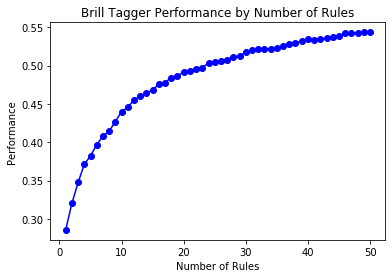

In [182]:
plt.plot(rules, perfs, '-bo')
plt.title("Brill Tagger Performance by Number of Rules")
plt.xlabel("Number of Rules")
plt.ylabel('Performance')
plt.show()

##### 33.

◑ Write code that builds a dictionary of dictionaries of sets. Use it to store the set of POS tags that can follow a given word having a given POS tag, i.e. $\text{word}_i$ → $\text{tag}_i$ → $\text{tag}_{i+1}$.

*It took quite a lot of trial and error to find the code that would create  nested dictionaries that were able to handle multiple entries.  It was quite easy to create nested dictionaries, but the problem was that instead of appending new key-value pairs, it would erase the previous one when updating to a new one.*

In [183]:
tag_plus = []

# simplified tagset
bts = brown.tagged_sents(tagset = 'universal')

# make a list of words with their tag and tag+1
for sent in bts:
    for i in range(len(sent) - 1):
        tag_plus.append((sent[i][0].lower(), sent[i][1], sent[i + 1][1]))
        

# get rid of duplicates
tag_plus = set(tag_plus)

In [184]:
from collections import defaultdict 

POS = defaultdict(list)

for word, tag1, tag2 in tag_plus:
    POS[word].append({tag1: tag2})
    

In [185]:
POS['the']

[{'DET': 'PRON'},
 {'X': 'X'},
 {'DET': 'ADJ'},
 {'DET': 'X'},
 {'DET': 'CONJ'},
 {'DET': 'ADV'},
 {'DET': 'ADP'},
 {'DET': 'NUM'},
 {'X': '.'},
 {'DET': 'PRT'},
 {'DET': 'NOUN'},
 {'DET': '.'},
 {'DET': 'VERB'}]

In [186]:
# same as above, but with the native Brown tags
from collections import defaultdict 
tag_plus = []

bts = brown.tagged_sents()

# make a list of words with their tag and tag+1
for sent in bts:
    for i in range(len(sent) - 1):
        tag_plus.append((sent[i][0].lower(), sent[i][1], sent[i + 1][1]))
        

# get rid of duplicates
tag_plus = set(tag_plus)

POS = defaultdict(list)

for word, tag1, tag2 in tag_plus:
    POS[word].append({tag1: tag2})
    

POS['the']

[{'AT': 'NNS$'},
 {'AT-HL': 'JJ-TL-HL'},
 {'AT': 'NR-TL'},
 {'AT': 'NPS-TL'},
 {'AT-HL': 'NP-TL-HL'},
 {'AT-HL': 'NNS-HL'},
 {'AT-HL': 'NR-HL'},
 {'AT-HL': 'NR-TL-HL'},
 {'AT': 'AP'},
 {'AT': 'VBN-TL'},
 {'AT': 'VBG-TL'},
 {'AT-TL': 'NP'},
 {'AT': 'JJT-TL'},
 {'AT': 'NR$-TL'},
 {'AT': 'NPS'},
 {'AT': 'FW-NN'},
 {'AT': 'NP-TL'},
 {'AT-NC': 'NN-NC'},
 {'AT-NC': 'JJR-NC'},
 {'AT': 'JJS-TL'},
 {'AT': 'JJ'},
 {'AT': 'VB'},
 {'AT': '``'},
 {'AT': 'FW-NN$'},
 {'AT': 'VBN'},
 {'AT-TL': 'NNS-TL'},
 {'AT': 'ABN'},
 {'AT-HL': 'JJ-TL'},
 {'AT-TL': 'NP-TL'},
 {'AT-TL': ','},
 {'AT': 'NN+BEZ'},
 {'AT': 'CC'},
 {'AT': 'FW-NN-TL'},
 {'AT': 'FW-CC'},
 {'AT': 'FW-JJ-TL'},
 {'AT': ','},
 {'AT-TL': 'NR-TL'},
 {'AT-TL': 'JJ$-TL'},
 {'AT': '--'},
 {'AT': 'NP'},
 {'AT': 'NN+HVZ'},
 {'AT-TL': 'NNS$-TL'},
 {'AT': 'NN-TL'},
 {'AT': 'PPO'},
 {'AT-TL': 'NPS-TL'},
 {'AT': 'JJ-TL'},
 {'AT': 'NP$-TL'},
 {'AT': 'VBD'},
 {'AT': 'UH'},
 {'AT': 'RB'},
 {'AT-TL': 'VBG'},
 {'AT-HL': 'NN-HL'},
 {'AT-TL': 'JJ-TL'},
 {'AT': 

##### 34. 

★ There are 264 distinct words in the Brown Corpus having exactly three possible tags.

* a. Print a table with the integers 1..10 in one column, and the number of distinct words in the corpus having 1..10 distinct tags in the other column.

* b. For the word with the greatest number of distinct tags, print out sentences from the corpus containing the word, one for each possible tag.

*Using the same code as 5.15.2:*

In [187]:
from collections import defaultdict

# create a ConditionalFreqDist with all the words in the corpus,
# with counts of each of their tags
dt = nltk.ConditionalFreqDist(brown.tagged_words())

# create a dictionary where the keys will be the number of distinct tags
tags = defaultdict(list)
for w in set(brown.words()):
    tags[len(dt[w])].append(w)

In [188]:
len(tags[3])

1146

*I'm very interested to know how they arrived at this figure.  If we just do a frequency distribution on the unaltered tags, we find that there are 1,146 words in the corpus with three possible tags.*

*If we eliminate suffixes for headlines and cited passages, we'll get 267 words.  I played around with eliminating other combinations of tags, and this is as close as I could get to 264. However, the maximum number of distinct tags in this group is 7 - again different from what's specified in the question, where it appears we could have up to 10 distinct tags.*

*So I'm just going to use the unaltered frequenices.  In this case, a word could have up to 12 distinct tags, not 10.*

In [189]:
max(tags)

12

In [190]:
for i in range(1, 13):
    print(i, "\t", len(tags[i]))

1 	 47328
2 	 7186
3 	 1146
4 	 265
5 	 87
6 	 27
7 	 12
8 	 1
9 	 1
10 	 2
11 	 1
12 	 1


In [191]:
tags[12]

['that']

In [192]:
that_tags = [tag for tag in dt['that']]

for sent in brown.tagged_sents():
    for word in sent:
        if word[0] == 'that' and word[1] in that_tags:
            print("EXAMPLE OF {}:".format(word[1]))
            print(*sent, sep = '\n')
            that_tags.remove(word[1])
            print('-------------------------')


EXAMPLE OF CS:
('The', 'AT')
('Fulton', 'NP-TL')
('County', 'NN-TL')
('Grand', 'JJ-TL')
('Jury', 'NN-TL')
('said', 'VBD')
('Friday', 'NR')
('an', 'AT')
('investigation', 'NN')
('of', 'IN')
("Atlanta's", 'NP$')
('recent', 'JJ')
('primary', 'NN')
('election', 'NN')
('produced', 'VBD')
('``', '``')
('no', 'AT')
('evidence', 'NN')
("''", "''")
('that', 'CS')
('any', 'DTI')
('irregularities', 'NNS')
('took', 'VBD')
('place', 'NN')
('.', '.')
-------------------------
EXAMPLE OF WPS:
('Regarding', 'IN')
("Atlanta's", 'NP$')
('new', 'JJ')
('multi-million-dollar', 'JJ')
('airport', 'NN')
(',', ',')
('the', 'AT')
('jury', 'NN')
('recommended', 'VBD')
('``', '``')
('that', 'CS')
('when', 'WRB')
('the', 'AT')
('new', 'JJ')
('management', 'NN')
('takes', 'VBZ')
('charge', 'NN')
('Jan.', 'NP')
('1', 'CD')
('the', 'AT')
('airport', 'NN')
('be', 'BE')
('operated', 'VBN')
('in', 'IN')
('a', 'AT')
('manner', 'NN')
('that', 'WPS')
('will', 'MD')
('eliminate', 'VB')
('political', 'JJ')
('influences', 'NN

##### 35.

★ Write a program to classify contexts involving the word *must* according to the tag of the following word. Can this be used to discriminate between the epistemic and deontic uses of *must*?

*__Epistemic__ and __deontic__ modality... Of course I know what you're talking about.  No need to explain anything for me...*

*This wasn't hard to look up, but a definition would have been nice...  There's a [Wikipedia entry](https://en.wikipedia.org/wiki/Linguistic_modality#Epistemic_and_deontic_modality "Epistemic and deontic modality") which gives good examples.  Basically, epistemic modality refers to logically deducing something (E.g., "He must have done it."); where deontic modality refers to obligation, and is comparable to "have to" (e.g., "You must do it.").*

*I would argue that the tag of the following word can only partially discriminate between the two modalities.  If a verb other than 'have' follows 'must', we can be reasonably sure that this is a deontic use of 'must': e.g., "You must brush your teeth before going to bed."*

*If the following word is 'have', it's most likely that this is an epistemic use of 'must', since we're probably postulating that something __must have__ happened (e.g., "He must have eaten my sandwich").  However, there is still the slight possibility that 'have' is being used in the sense of 'to possess', in which case this would be a deontic use of 'must': e.g., "You must have your permission slip to go on the trip."* 

*However, if the following word is 'be', we need to know the context in order to determine the modality.  "You must be tired" is clearly a epistemic use of "must"; whereas "You must be quiet" is surely a deontic use.*

*In my code, I used a basic dictionary to tabulate the count of the tags that come after 'must':*

In [193]:
must = {}

bts = brown.tagged_sents()

# tabulate the tags that come after 'must'
for sent in bts:
    for i in range(len(sent) - 1):
        if sent[i][0].lower() == 'must':
            must[sent[i + 1][1]] = must.get(sent[i + 1][1], 0) + 1


In [194]:
must

{'BE': 369,
 'VB': 354,
 'VB-HL': 2,
 'HV': 136,
 '*': 21,
 'VB-TL': 2,
 'IN': 6,
 "''": 3,
 'RB': 74,
 'NP-HL': 1,
 ',': 17,
 'DO': 7,
 'PPSS': 1,
 'AT': 2,
 '.': 1,
 'NNS': 1,
 'CC': 2,
 'BE-HL': 2,
 'VBZ': 1,
 'HV-TL': 1,
 'PPLS': 1,
 'NIL': 1,
 'RB-HL': 1,
 'ABX': 1,
 'PPO': 2,
 'NN': 1,
 'PPS': 2,
 'ABN': 1}

*I used a different program to sort the sentences by context.  The sentences are again grouped by the tag that follows 'must'.  Since the tagged sentences are a bit difficult to read, I used the corresponding sentence from `brown.sents()` instead.*

In [195]:
from collections import defaultdict 
must_examples = defaultdict(list)

bts = brown.tagged_sents()
bs = brown.sents()

# if a sentence has must, add the sentence to the dictionary
for x in range(len(bts)):
    for i in range(len(bts[x]) - 1):
        if bts[x][i][0].lower() == 'must':
            must_examples[bts[x][i + 1][1]].append(' '.join(bs[x]))

In [196]:
must_examples

defaultdict(list,
            {'BE': ['The largest hurdle the Republicans would have to face is a state law which says that before making a first race , one of two alternative courses must be taken : 1',
              'On the negative side of the balance sheet must be set some disappointment that the United States leadership has not been as much in evidence as hoped for .',
              "The secretary's greatest achievement is perhaps the rekindling of NATO realization that East-West friction , wherever it take place around the globe , is in essence the general conflict between two entirely different societies , and must be treated as such without regard to geographical distance or lack of apparent connection .",
              "The small shops `` must be retained , for they provide essential service to the community '' , according to the resolution , which added that they `` also are the source of livelihood for thousands of our neighbors '' .",
              'The law which governs ho

##### 35.

★ Create a regular expression tagger and various unigram and n-gram taggers, incorporating backoff, and train them on part of the Brown corpus.

* a. Create three different combinations of the taggers. Test the accuracy of each combined tagger. Which combination works best?

* b. Try varying the size of the training corpus. How does it affect your results?

In [197]:
# adapted from question 27

size = int(len(brown.tagged_sents()) * .9)
train_sents = brown.tagged_sents()[:size]
test_sents = brown.tagged_sents()[size:]

# patterns adapted from question 22

patterns = [
    (r'.*ing$', 'VBG'),                      # gerunds 
    (r'.*ed$', 'VBD'),                       # simple past
    (r'.*es$', 'VBZ'),                       # 3rd singular present
    (r'.*ould$', 'MD'),                      # modals
    (r'.\'s$', 'NN$'),                       # possessive nouns
    (r'.*s$', 'NNS'),                        # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),        # cardinal numbers
    (r'.*ly$|.*wise', 'ADV'),                # adverbs
    
    # adjectives
    (r'.*y$|.*ish$|.*ive$|.*[ai]ble$|.*ful$|.*ous$|.*less', 'JJ'),
    
    (r'^th.{1,3}|^an?$', 'DET'),             # determiners/articles 
    (r'[\.,!\?;:\'\"\(\)\[\]``]', '.'),      # punctuation 
    (r'.*ate$|.*en$|.*fy$|.*i[sz]e$', 'VB'), # verbs, base form
    (r'.*', 'NN')                            # nouns (default)
]

t0 = regexp_tagger = nltk.RegexpTagger(patterns)
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t2.evaluate(test_sents)

0.9160118186961715

*The accuracy when using the default tagger (i.e., everything 'NN') was .9125751765470128, so there is a slight improvement when using the regex tagger.*

*There are only $!3$ (or 6) ways of combining three taggers, so we may as well try all the combinations.  Instead of renaming the taggers, I'll just change the ordering.*

In [198]:
t1 = nltk.UnigramTagger(train_sents)
t0 = regexp_tagger = nltk.RegexpTagger(patterns, backoff = t1)
t2 = nltk.BigramTagger(train_sents, backoff = t0)
t2.evaluate(test_sents)

0.8666624756396555

In [199]:
t2 = nltk.BigramTagger(train_sents)
t0 = regexp_tagger = nltk.RegexpTagger(patterns, backoff = t2)
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t1.evaluate(test_sents)

0.8948680874248235

In [200]:
t0 = regexp_tagger = nltk.RegexpTagger(patterns)
t2 = nltk.BigramTagger(train_sents, backoff = t0)
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t1.evaluate(test_sents)

0.8948680874248235

In [201]:
t1 = nltk.UnigramTagger(train_sents)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t0 = regexp_tagger = nltk.RegexpTagger(patterns, backoff = t2)
t0.evaluate(test_sents)

0.2313446910165336

In [202]:
t2 = nltk.BigramTagger(train_sents)
t1 = nltk.UnigramTagger(train_sents, backoff = t2)
t0 = regexp_tagger = nltk.RegexpTagger(patterns, backoff = t1)
t0.evaluate(test_sents)

0.2313446910165336

*None of these combinations was as accurate as the first.*

*Before we start diving into training size, there is one issue I want to deal with.  In there is any sort of order in our set, we should perform some sort of shuffling operation to guarantee that we take a random selection of samples for our training set.  If we just train on the beginning of the set and test on the end of set, we might end up training and testing on two quite different groups of data.*

In [203]:
import random

new_list = [sent for sent in brown.tagged_sents()]
shuffled = random.sample(new_list, len(new_list))
size = int(len(shuffled) * .9)


train_sents = shuffled[:size]
test_sents = shuffled[size:]

# patterns adapted from question 22

patterns = [
    (r'.*ing$', 'VBG'),                      # gerunds 
    (r'.*ed$', 'VBD'),                       # simple past
    (r'.*es$', 'VBZ'),                       # 3rd singular present
    (r'.*ould$', 'MD'),                      # modals
    (r'.\'s$', 'NN$'),                       # possessive nouns
    (r'.*s$', 'NNS'),                        # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),        # cardinal numbers
    (r'.*ly$|.*wise', 'ADV'),                # adverbs
    
    # adjectives
    (r'.*y$|.*ish$|.*ive$|.*[ai]ble$|.*ful$|.*ous$|.*less', 'JJ'),
    
    (r'^th.{1,3}|^an?$', 'DET'),             # determiners/articles 
    (r'[\.,!\?;:\'\"\(\)\[\]``]', '.'),      # punctuation 
    (r'.*ate$|.*en$|.*fy$|.*i[sz]e$', 'VB'), # verbs, base form
    (r'.*', 'NN')                            # nouns (default)
]

t0 = regexp_tagger = nltk.RegexpTagger(patterns)
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t2 = nltk.BigramTagger(train_sents, backoff = t1)
t2.evaluate(test_sents)

0.9274675906981603

*The improvement may not seem huge, but we were already close to 100%, so we could look at this as reducing our error rate by more than 10%.*

*Let's see how accurate the tagger is on a variety of training set sizes.  We'll start at 10% for the training set and go up to 90%:*

In [204]:
import numpy as np

new_list = [sent for sent in brown.tagged_sents()]
shuffled = random.sample(new_list, len(new_list))

sizes = np.arange(.1, 1, .1)
perfs = []

for s in sizes:

    size = int(len(shuffled) * s)


    train_sents = shuffled[:size]
    test_sents = shuffled[size:]

    # patterns adapted from question 22

    patterns = [
        (r'.*ing$', 'VBG'),                      # gerunds 
        (r'.*ed$', 'VBD'),                       # simple past
        (r'.*es$', 'VBZ'),                       # 3rd singular present
        (r'.*ould$', 'MD'),                      # modals
        (r'.\'s$', 'NN$'),                       # possessive nouns
        (r'.*s$', 'NNS'),                        # plural nouns
        (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),        # cardinal numbers
        (r'.*ly$|.*wise', 'ADV'),                # adverbs

        # adjectives
        (r'.*y$|.*ish$|.*ive$|.*[ai]ble$|.*ful$|.*ous$|.*less', 'JJ'),

        (r'^th.{1,3}|^an?$', 'DET'),             # determiners/articles 
        (r'[\.,!\?;:\'\"\(\)\[\]``]', '.'),      # punctuation 
        (r'.*ate$|.*en$|.*fy$|.*i[sz]e$', 'VB'), # verbs, base form
        (r'.*', 'NN')                            # nouns (default)
    ]

    t0 = regexp_tagger = nltk.RegexpTagger(patterns)
    t1 = nltk.UnigramTagger(train_sents, backoff = t0)
    t2 = nltk.BigramTagger(train_sents, backoff = t1)
    perfs.append(t2.evaluate(test_sents))

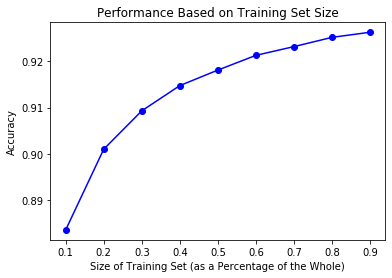

In [205]:
import matplotlib.pyplot as plt

plt.plot(sizes, perfs, '-bo')
plt.title("Performance Based on Training Set Size")
plt.xlabel("Size of Training Set (as a Percentage of the Whole)")
plt.ylabel("Accuracy")
plt.show()

*Unsurprisingly, performance goes up with an increase in the size of the training set.*

##### 37. 

★ Our approach for tagging an unknown word has been to consider the letters of the word (using `RegexpTagger()`), or to ignore the word altogether and tag it as a noun (using `nltk.DefaultTagger()`). These methods will not do well for texts having new words that are not nouns. Consider the sentence *I like to blog on Kim's blog*. If *blog* is a new word, then looking at the previous tag (`TO` versus `NP$`) would probably be helpful. I.e. we need a default tagger 
that is sensitive to the preceding tag.

* a. Create a new kind of unigram tagger that looks at the tag of the previous word, and ignores the current word. (The best way to do this is to modify the source code for `UnigramTagger()`, which presumes knowledge of object-oriented programming in Python.)

* b. Add this tagger to the sequence of backoff taggers (including ordinary trigram and bigram taggers that look at words), right before the usual default tagger.

* c. Evaluate the contribution of this new unigram tagger.

*Source code for the taggers is available [here](https://www.nltk.org/_modules/nltk/tag/sequential.html#UnigramTagger.context "UnigramTagger").  I've often visited [this guy's repo](https://github.com/walshbr/nltk/blob/master/ch_five/37.py) as he's posted almost all of his answers to the questions in the NLTK.  I don't often find his code useful (I feel that he often misunderstands the questions), but in this case he hit the nail right on the head with a very simple solution.  I tried my best not to copy his solution; but considering how basic it is, there's not much I could do to change it.*

In [206]:
from nltk.tag.sequential import *
from nltk import jsontags



tagged_sents = brown.tagged_sents(categories="news")

size = int(len(tagged_sents) * 0.9)
train_sents = tagged_sents[:size]
test_sents = tagged_sents[size:]


@jsontags.register_tag
class PreviousTagger(UnigramTagger):
    json_tag = "nltk.tag.sequential.PreviousTagger"
    
    def __init__(self, train=None, model=None, backoff=None, cutoff=0, verbose=False):
        NgramTagger.__init__(self, 0, train, model, backoff, cutoff, verbose)
        
    def encode_json_obj(self):
        return self._context_to_tag, self.backoff


    @classmethod
    def decode_json_obj(cls, obj):
        _context_to_tag, backoff = obj
        return cls(model = _context_to_tag, backoff = backoff)

    def context(self, tokens, index, history):
        if index != 0:
            return history[index-1]
        else:
            return None


t0 = nltk.DefaultTagger('NN')
t1 = PreviousTagger(train_sents, backoff = t0)
t2 = nltk.UnigramTagger(train_sents, backoff = t1)
t3 = nltk.BigramTagger(train_sents, backoff = t2)
t4 = nltk.TrigramTagger(train_sents, backoff = t3)

# example from the book
t4.tag(["I", "like", "to", "blog", "on", "Kim's", "blog"])

[('I', 'PPSS'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('blog', 'VB'),
 ('on', 'IN'),
 ("Kim's", 'AT'),
 ('blog', 'NN')]

In [207]:
new_list = [sent for sent in brown.tagged_sents()]
shuffled = random.sample(new_list, len(new_list))

size = int(len(shuffled) * .9)


train_sents = shuffled[:size]
test_sents = shuffled[size:]

t0 = nltk.DefaultTagger('NN')
t1 = PreviousTagger(train_sents, backoff=t0)
t2 = nltk.UnigramTagger(train_sents, backoff=t1)
t3 = nltk.BigramTagger(train_sents, backoff=t2)
t4 = nltk.TrigramTagger(train_sents, backoff=t3)
t4.evaluate(test_sents)

0.9235303749795317

*Performance is slightly better than the default tagger, but slightly worse than with the regex classifier.*

*What if we combine this with the regex tagger?*

In [208]:
patterns = [
        (r'.*ing$', 'VBG'),                      # gerunds 
        (r'.*ed$', 'VBD'),                       # simple past
        (r'.*es$', 'VBZ'),                       # 3rd singular present
        (r'.*ould$', 'MD'),                      # modals
        (r'.\'s$', 'NN$'),                       # possessive nouns
        (r'.*s$', 'NNS'),                        # plural nouns
        (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),        # cardinal numbers
        (r'.*ly$|.*wise', 'ADV'),                # adverbs

        # adjectives
        (r'.*y$|.*ish$|.*ive$|.*[ai]ble$|.*ful$|.*ous$|.*less', 'JJ'),

        (r'^th.{1,3}|^an?$', 'DET'),             # determiners/articles 
        (r'[\.,!\?;:\'\"\(\)\[\]``]', '.'),      # punctuation 
        (r'.*ate$|.*en$|.*fy$|.*i[sz]e$', 'VB'), # verbs, base form
        (r'.*', 'NN')                            # nouns (default)
    ]

t0 = regexp_tagger = nltk.RegexpTagger(patterns)
t1 = PreviousTagger(train_sents, backoff = t0)
t2 = nltk.UnigramTagger(train_sents, backoff = t1)
t3 = nltk.BigramTagger(train_sents, backoff = t2)
t4 = nltk.TrigramTagger(train_sents, backoff = t3)
t4.evaluate(test_sents)

0.9238061585928141

*Again, it's slightly worse than with the combination of the default tagger and the regex tagger. What if we switched the ordering?*

In [209]:
t0 = PreviousTagger(train_sents)
t1 = regexp_tagger = nltk.RegexpTagger(patterns, backoff = t0)
t2 = nltk.UnigramTagger(train_sents, backoff = t1)
t3 = nltk.BigramTagger(train_sents, backoff = t2)
t4 = nltk.TrigramTagger(train_sents, backoff = t3)
t4.evaluate(test_sents)

0.9290288107693501

*The performance goes up again - albeit slightly.  This demonstrates that the `regexp_tagger` is more accurate than `PreviousTagger`, no matter how much I dislike the regex tagger.*

##### 38.

★ Consider the code in [5](https://www.nltk.org/book/ch05.html#sec-n-gram-tagging) which determines the upper bound for accuracy of a trigram tagger. Review Abney's discussion concerning the impossibility of exact tagging (Church, Young, & Bloothooft, 1996). Explain why correct tagging of these examples requires access to other kinds of information than just words and tags. How might you estimate the scale of this problem?

*What we're touching on here is whether a machine can acquire "real world" knowledge in order to solve an NLP problem.  Although I'm in no position to label myself an expert on such matters, it seems that in the last nearly 25 years the question has shifted considerably.  Creating "real world" knowledge requires crafting sophisticated rules which are very laborious and brittle, and since the writing of the original NLTK book, attitudes have shifted considerably. Now, in the age of Big Data and neural networks, the belief is that with enough data, we can forgo such rule-building systems.  In systems such as Word2Vec, with enough examples machines can build networks to show how words are related to each other, and these networks can be used as proxies for knowledge about the real world.*

##### 39. 

★ Use some of the estimation techniques in `nltk.probability`, such as *Lidstone* or *Laplace* estimation, to develop a statistical tagger that does a better job than n-gram backoff taggers in cases where contexts encountered during testing were not seen during training.


*Taggers that use smoothing take a long time to train and evaluate, so we'll use smaller train/test corpora here:*

In [210]:
# adapted from http://www.nltk.org/howto/probability.html

# train/test split
train_corpus = shuffled[:4500]
test_corpus = shuffled[4500:5000]

In [211]:
# with Laplace smoothing
from nltk.probability import *

tagger = trainer.train_supervised(train_corpus, estimator = LaplaceProbDist)

In [20]:
tagger.evaluate(test_corpus)

0.7806855500821018

In [15]:
def lidstone(gamma):
    return lambda fd, bins: LidstoneProbDist(fd, gamma, bins)


In [217]:
tagger = trainer.train_supervised(train_corpus, estimator = lidstone(0.1))

In [218]:
# With Lidstone smoothing
tagger.evaluate(test_corpus)

0.8604673526300606

In [213]:
# trying various gamma rates
gamma = [1.0, 0.5, 0.1, 0.05, 0.01, 0.005]

perfs = []

for g in gamma:
    tagger = trainer.train_supervised(train_corpus, estimator = lidstone(g))
    perfs.append(tagger.evaluate(test_corpus))
    

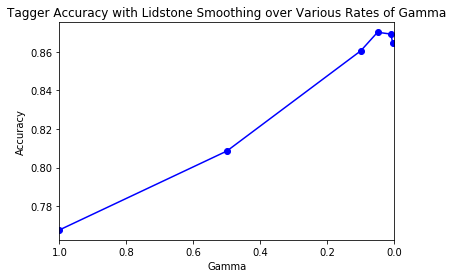

In [216]:
plt.plot(gamma, perfs, '-bo')
plt.title("Tagger Accuracy with Lidstone Smoothing over Various Rates of Gamma")
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xlim(1.0, 0)
plt.show()

*As the plot above shows, accuracy peaks when gamma is about 0.1.*

*For the sake of comparison, we can compare how a bigram tagger with backoff would do with the same corpora:*

In [23]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_corpus, backoff = t0)
t2 = nltk.BigramTagger(train_corpus, backoff = t1)
t2.evaluate(test_corpus)

0.8599137931034483

*The tagger with Laplace smoothing fared worse than the bigram tagger, but when the tagger with Lidstone smoothing used the most appropriate gamma rate, it performed slightly better.*

##### 40.

★ Inspect the diagnostic files created by the Brill tagger `rules.out` and `errors.out`. Obtain the demonstration code by accessing the source code (at http://www.nltk.org/code) and create your own version of the Brill tagger. Delete some of the rule templates, based on what you learned from inspecting `rules.out`. Add some new rule templates which employ contexts that might help to correct the errors you saw in `errors.out`.

*I'll have to skip this, since there are issues with the Brill tagger and it does not seem possible at present to access either the `rules.out` or `errors.out` files.*

##### 41. 

★ Develop an n-gram backoff tagger that permits "anti-n-grams" such as `["the", "the"]` to be specified when a tagger is initialized. An anti-ngram is assigned a count of zero and is used to prevent backoff for this n-gram (e.g. to avoid estimating P(*the* | *the*) as just P(*the*)).

*I don't understand how I'm supposed to approach this, and I'm not sure anyone else does, either: A quick search online reveals that no one else has tackled this and then published their results.  So, at this moment I think my time might be better spent on other problems.*

##### 42. 

★ Investigate three different ways to define the split between training and testing data when developing a tagger using the Brown Corpus: genre (`category`), source (`fileid`), and sentence. Compare their relative performance and discuss which method is the most legitimate. (You might use n-fold cross validation, discussed in [3](https://www.nltk.org/book/ch06.html#sec-evaluation), to improve the accuracy of the evaluations.)

*Before we try any of the new methods, let's set up a reference point.  We'll just try something similar to some of the train/test splits used in the book so far: place 90% of the corpus in the training set and 10% in the testing set.  To determine which sentences go into which corpora, we'll calculate the length of the corpus, multiply this by 90%, put anything before this marker in training set, and anything after in the test set.*

In [237]:
bts = brown.tagged_sents()
size = int(len(bts) * 0.9)

train_corpus = bts[:size]
test_corpus = bts[size:]

In [238]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_corpus, backoff = t0)
t2 = nltk.BigramTagger(train_corpus, backoff = t1)
t2.evaluate(test_corpus)

0.9125751765470128

*But as I mentioned above, this method assumes there's no order to the indexing.  If certain categories are indexed at certain spots, they may be featured only in either the training or the test set, but not both.  This will affect the accuracy of the evaluations.  To avoid this, the first thing I will try is going through the corpus category by category and dividing each category into a 90/10 training/test split.*

In [235]:
train_corpus = []
test_corpus = []

for c in brown.categories():

    bts = brown.tagged_sents(categories = c)
    size = int(len(bts) * 0.9)

    temp_train = bts[:size]
    temp_test = bts[size:]

    train_corpus += temp_train
    test_corpus += temp_test

In [236]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_corpus, backoff = t0)
t2 = nltk.BigramTagger(train_corpus, backoff = t1)
t2.evaluate(test_corpus)

0.909745418623536

*This actually performed slightly worse, which surprised me somewhat.*

*The next method I would like to try uses the `fileids` for each document inside the corpus.  Each document has a four-character i.d.: the first two characters are letters indicating which category the document belongs, and the last two characters are digits sequentially labelling the documents.  If I place all of the documents whose i.d. ends with "1" into the testing corpus, I'll end up with a random assortment of about 10% of the total documents.*

In [250]:
train_corpus = []
test_corpus = []

for i in brown.fileids():
    if i[-1] == "1":
        test_corpus += [sent for sent in brown.tagged_sents(fileids = i)]
    else:
        train_corpus += [sent for sent in brown.tagged_sents(fileids = i)]

In [251]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_corpus, backoff = t0)
t2 = nltk.BigramTagger(train_corpus, backoff = t1)
t2.evaluate(test_corpus)

0.9093961883084617

*Again, I'm somewhat surprised the results are again a bit worse than the baseline.*

*The next thing I'll try is shuffling the sentences so that they are out of order.  This way, pure luck decides which sentences end up in the training set and which end up in the test set.*

In [255]:
import random

bts = list(brown.tagged_sents())
random.shuffle(bts)
size = int(len(bts) * 0.9)

train_corpus = bts[:size]
test_corpus = bts[size:]

In [256]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_corpus, backoff = t0)
t2 = nltk.BigramTagger(train_corpus, backoff = t1)
t2.evaluate(test_corpus)

0.9241682177258185

*This performed slightly better than the baseline.  If we consider it from the perspective of the amount of error reduced, we're now doing about 10% better.*

*The last thing I'll try is k-folds cross validation.*

In [282]:
slices = [x for x in np.arange(.1, 1.0, 0.1)]

evals = []
for i in range(len(slices)):
    if i == 0:
        bts = brown.tagged_sents()
        size = int(len(bts) * slices[i])
        train_corpus, test_corpus = bts[size:], bts[:size]
    elif i == 8:
        bts = brown.tagged_sents()
        size = int(len(bts) * slices[i])
        train_corpus, test_corpus = bts[:size], bts[size:]
    else:
        bts = brown.tagged_sents()
        size1 = int(len(bts) * slices[i])
        size2 = int(len(bts) * slices[i + 1])
        train_corpus = bts[:size1] + bts[size2:]
        test_corpus = bts[size1:size2]
        
    t0 = nltk.DefaultTagger('NN')
    t1 = nltk.UnigramTagger(train_corpus, backoff = t0)
    t2 = nltk.BigramTagger(train_corpus, backoff = t1)
    evals.append(t2.evaluate(test_corpus))
    

In [283]:
np.average(evals)

0.9069345663394456

*Interesting to note that this produces a lower accuracy figure than any of the randomization methods we've tried.*

##### 43 

★ Develop your own `NgramTagger` class that inherits from NLTK's class, and which encapsulates the method of collapsing the vocabulary of the tagged training and testing data that was described in this chapter. Make sure that the unigram and default backoff taggers have access to the full vocabulary.

*This also looks like it would take more time than I have to dedicate now.  The wording of the question is also a bit confusing: When the authors mention "the method of collapsing vocabulary ... that was described in this chapter", I assume they are referring to the practice of replacing words that occur less than $X$ times with the 'UNK' token, as was described in question 30.*

*I had some issues with question 30, and for practice I revisited [a site I came across when working on this question for the first time](https://gawron.sdsu.edu/compling/course_core/comp_ling_assignments/NLTK_tagging_assignment_answer.html "using 'UNK'").  The code seems to be from an (older) blog with answers to questions from a CS class.  Initially I couldn't reproduce the author's results, but this time I was able to get it to work.*

*In theory, it wouldn't be impossible to develop a new class to do the same thing as the code below.  However, this code was designed to work specifically with the Brown Corpus, and crafting code that would work with any corpus would take more time than I'm will to spend now.*

In [289]:
fd = nltk.FreqDist(brown.words())
word_list = fd.keys()

In [290]:
word_mapping = dict((w, w) if fd[w] > 3 else (w, 'UNK')
                    for w in word_list)
brown_tagged_sent = brown.tagged_sents(categories = 'news')
new_brown_tagged_sent = [[(word_mapping[wd], tag) for 
                          (wd, tag) in sent]
                          for sent in brown_tagged_sent]
training_size = int(len(brown_tagged_sents) * 0.9)
unk_train_sents = new_brown_tagged_sent[:training_size]
unk_test_sents = new_brown_tagged_sent[training_size:]
t0 = nltk.UnigramTagger(unk_train_sents)
t1 = nltk.BigramTagger(unk_train_sents, backoff = t0)
t2.evaluate(unk_test_sents)

0.9206618160071763

In [291]:
t0 = nltk.UnigramTagger(unk_train_sents)
t1 = nltk.BigramTagger(unk_train_sents, backoff = t0)
t2 = nltk.UnigramTagger(train_sents, backoff = t1)
t3 = nltk.BigramTagger(train_sents, backoff = t2)

In [292]:
train_wds = set([wd for sent in train_sents for (wd, tag) in sent])

In [293]:
prep_test_sent = [[(wd, tag) if wd in train_wds else ('UNK', tag)
                   for (wd, tag) in sent] for sent in brown_tagged_sent]
t3.evaluate(prep_test_sent)

0.9618513435566959